In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
df= pd.read_csv("/home/nsangph/data_sci_2025/Intro-To-ML-Proj/data/ncr_ride_bookings.csv")
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


In [5]:
df.shape

(150000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

## Feature Eng

In [7]:
#Create a 'date_time' column by combining 'Date' and 'Time'
df['date_time']= pd.to_datetime(df['Date']+' '+df['Time'])

#Extract 'Month','Day','Hour' from 'date_time'
df['Month']= df['date_time'].dt.month
df['Day']= df['date_time'].dt.day_name()
df['Hour']=df['date_time'].dt.hour

#Sort the dataframe by 'date_time'
df= df.sort_values(by='date_time')

#Reorder columns to have 'Month', 'Day', 'Hour' first
new_cols= ['Month','Day','Hour']
df= df[ new_cols + [c for c in df.columns if c not in new_cols ]]


### booking distribution by Month

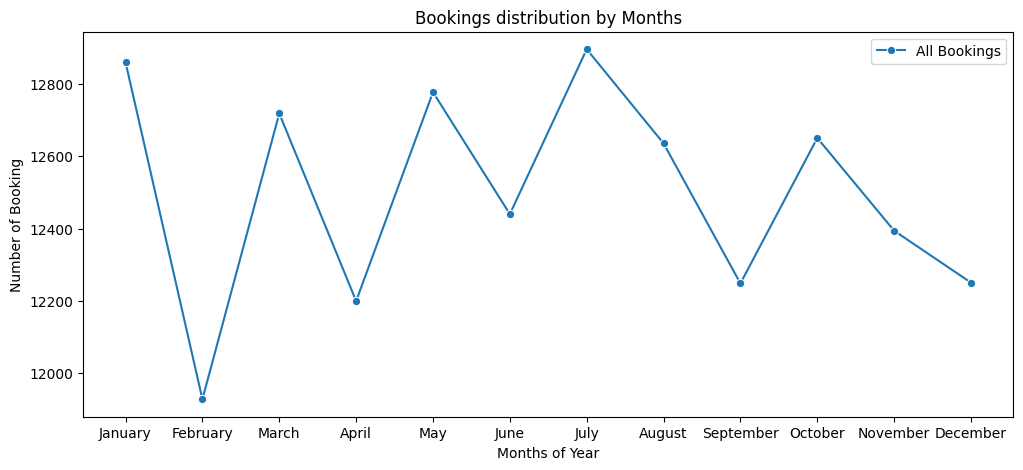

In [11]:
# Compute mean bookings per month
month_means = df.groupby('Month').size().groupby(level=0).mean()

# Or simpler (directly with groupby):
month_means = df.groupby('Month').size().reindex(range(1,13), fill_value=0)

# Plot
sns.lineplot(x=month_means.index, y=month_means.values, marker='o', label="All Bookings")

plt.xlabel("Months of Year")
plt.ylabel("Number of Booking")
plt.title("Bookings distribution by Months")
plt.xticks(ticks=range(1,13), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.gcf().set_size_inches(12, 5)
plt.legend()
plt.show()

### Booking distribution by day

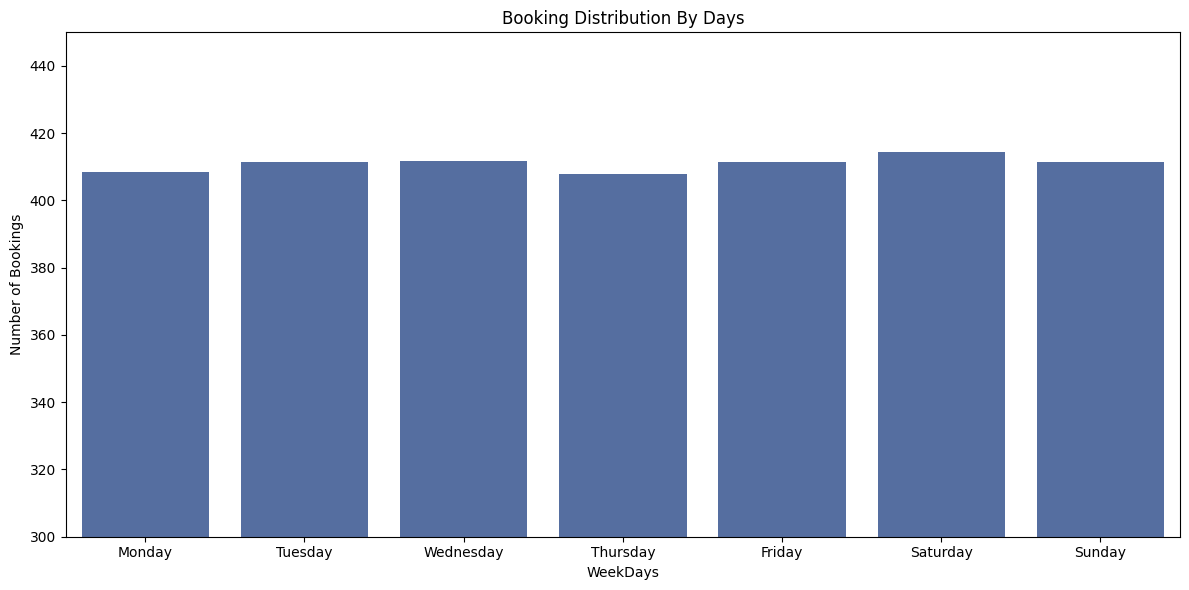

In [12]:
booking_perDay= df.groupby(['Date','Day']).size().reset_index(name= 'count')
mean_bookingperDay= booking_perDay.groupby('Day')['count'].mean().reset_index()

ordered_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(12,6))
sns.barplot(data= mean_bookingperDay, x= 'Day', y= 'count',order= ordered_days, color= "#486aad")
plt.ylabel('Number of Bookings')
plt.xlabel('WeekDays')
plt.title( 'Booking Distribution By Days')
plt.ylim(300,450)
plt.tight_layout()
plt.show()

### Booking distribution by Hour

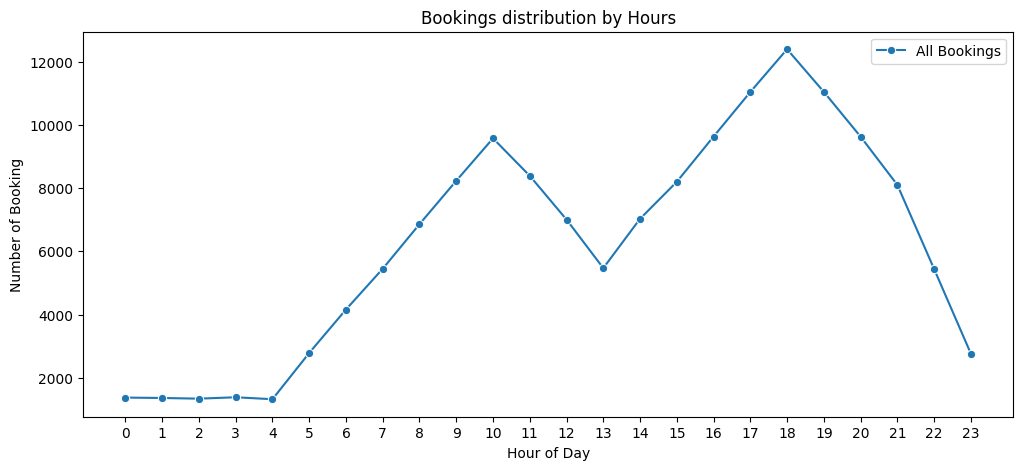

In [13]:
# Define full range of hours
hours = range(0, 24)

# Count total bookings per hour
hour_counts = df['Hour'].value_counts().reindex(hours, fill_value=0)

# Plot
sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o', label="All Bookings")

plt.xlabel("Hour of Day")
plt.ylabel("Number of Booking")
plt.title("Bookings distribution by Hours")
plt.xticks(range(0,24))
plt.gcf().set_size_inches(12, 5)
plt.legend()
plt.show()

### Bookings Heatmap: Hour vs Day

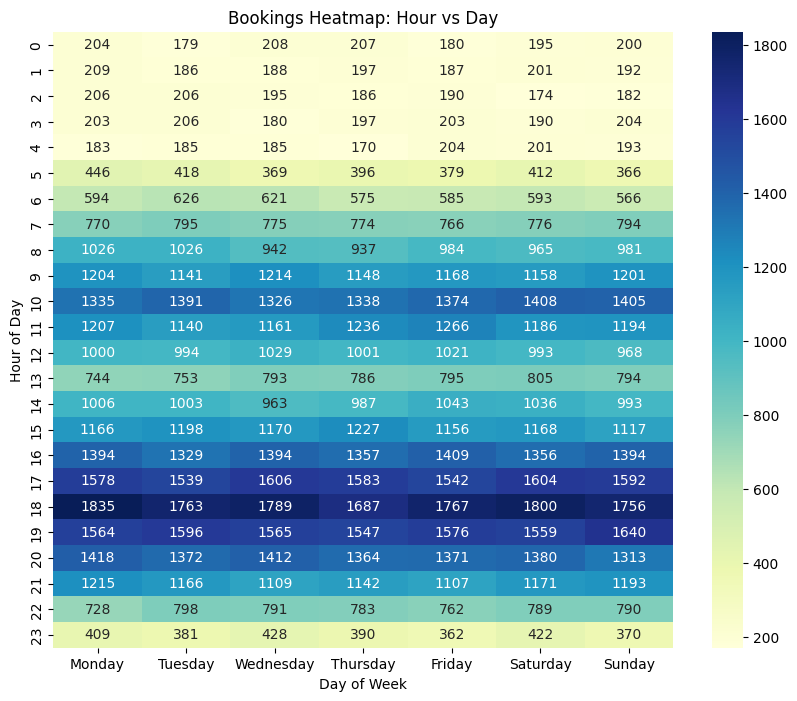

In [14]:
# Define ordered days (so they don't appear randomly)
ordered_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]


# Create a pivot table: rows=hour, columns=day, values=number of bookings
heatmap_data = df.pivot_table(index='Hour', columns='Day', values='Booking ID', aggfunc='count').reindex(columns=ordered_days)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.title("Bookings Heatmap: Hour vs Day")
plt.show()

### Booking status distribution

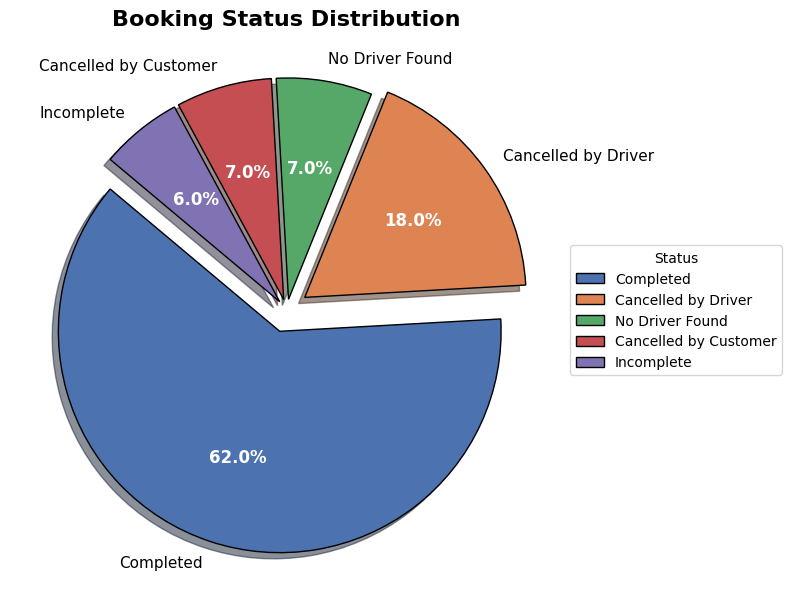

In [15]:
#Count occurrences of each booking status
counts = df['Booking Status'].value_counts()

#Total booking status
total = counts.sum()

#Define explosion to highlight important segments (>15%)
explode = [0.1 if (v / total) >= 0.15 else 0.05 for v in counts.values]

#Plot
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors = sns.color_palette("deep") ,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

#Style tweaks
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

#Title
ax.set_title("Booking Status Distribution", fontsize=16, fontweight='bold')

#Legend (in case labels overlap)
ax.legend(wedges, counts.index, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

### Reasons for each booking status

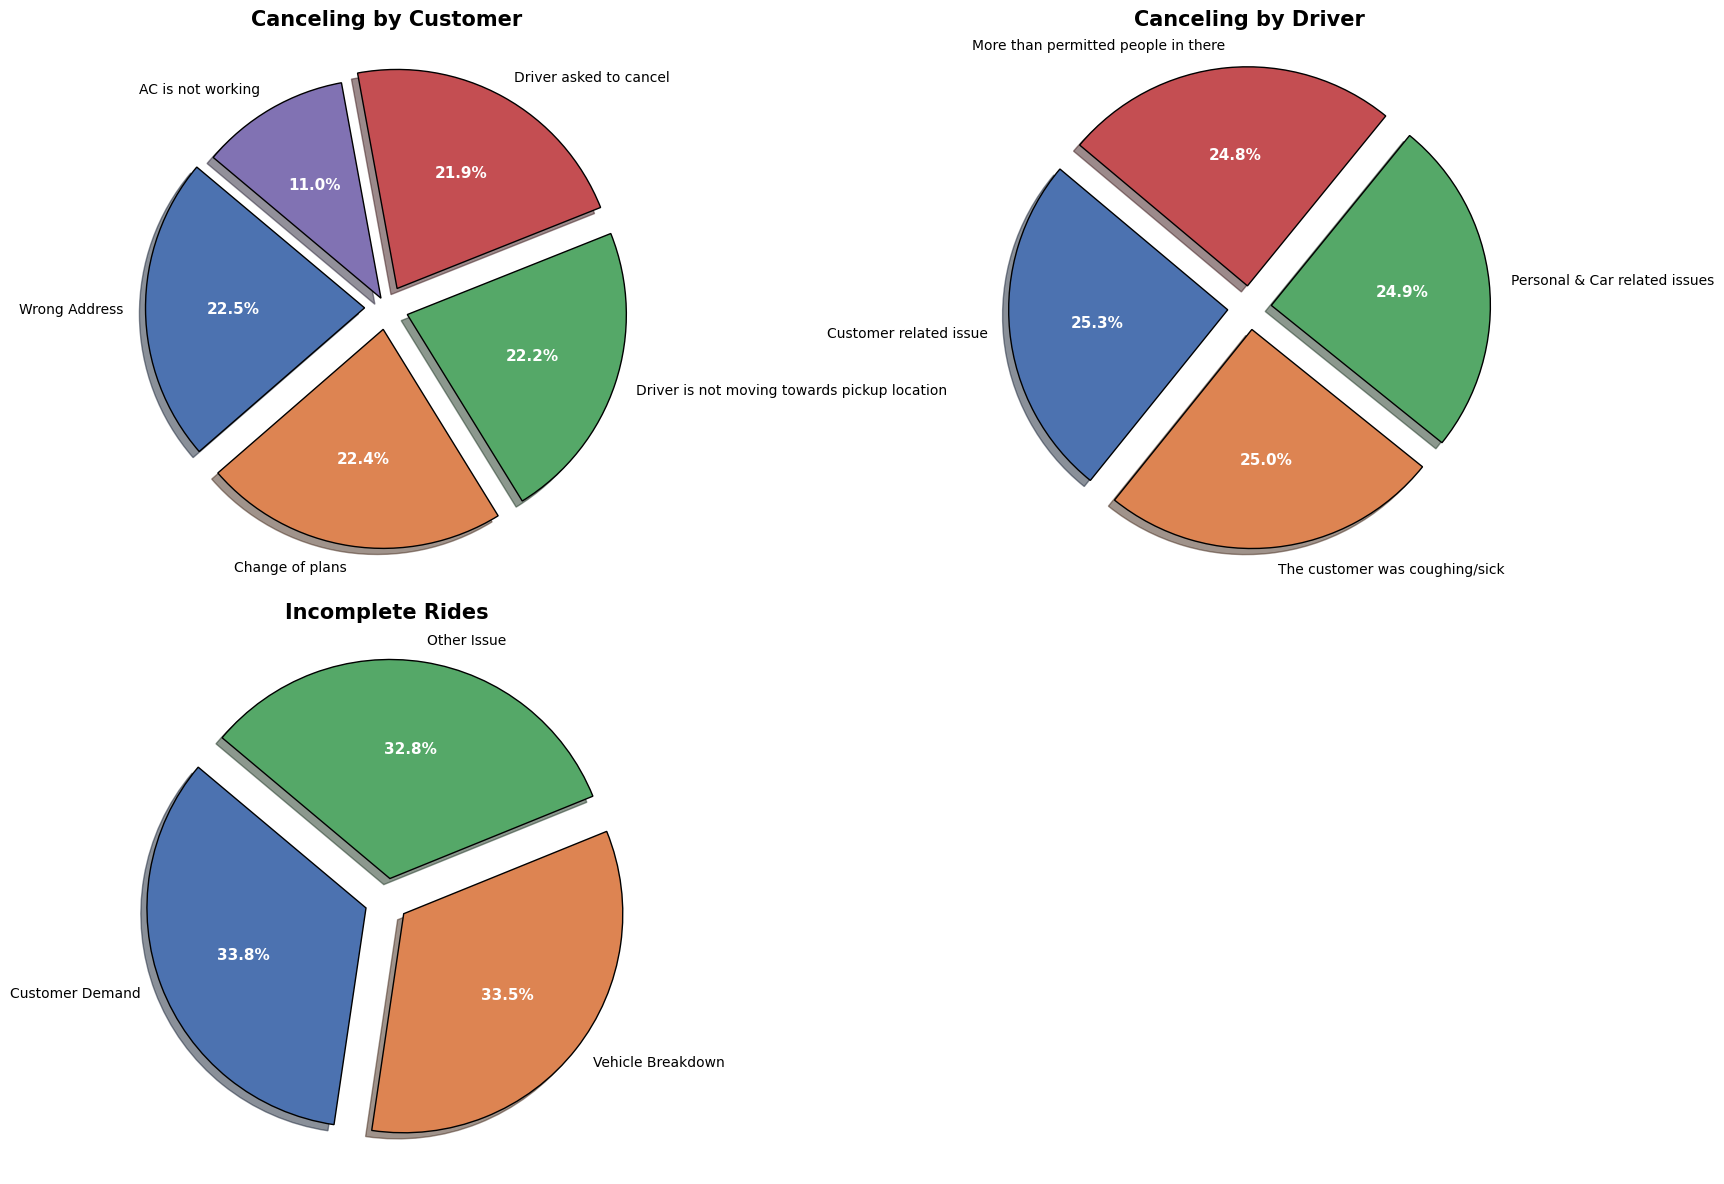

In [16]:
#Define the three columns
cols = ["Reason for cancelling by Customer", "Driver Cancellation Reason", "Incomplete Rides Reason"]
titles = ["Canceling by Customer", "Canceling by Driver", "Incomplete Rides"]
#2 rows x 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # bigger figure
axes = axes.flatten()  # flatten to 1D array for easy indexing

for i, (col, title) in enumerate(zip(cols, titles)):
    counts = df[col].value_counts(dropna=True)
    total = counts.sum()
    
    #Explode slices
    explode = [0.1 if v/total >= 0.15 else 0.05 for v in counts.values]
    

    wedges, texts, autotexts = axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        shadow=True,
        explode=explode,
        wedgeprops={'edgecolor': 'black'},
        colors= sns.color_palette("deep") ,
    )
    
    for text in texts:
        text.set_fontsize(10)
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_fontsize(11)
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    axes[i].set_title(title, fontsize=15, fontweight='bold')
    axes[i].set_aspect('equal')

#Remove the empty 4th subplot
fig.delaxes(axes[3])

plt.tight_layout()
plt.show()

### Cancellation by driver Rate Analysis by Hour 

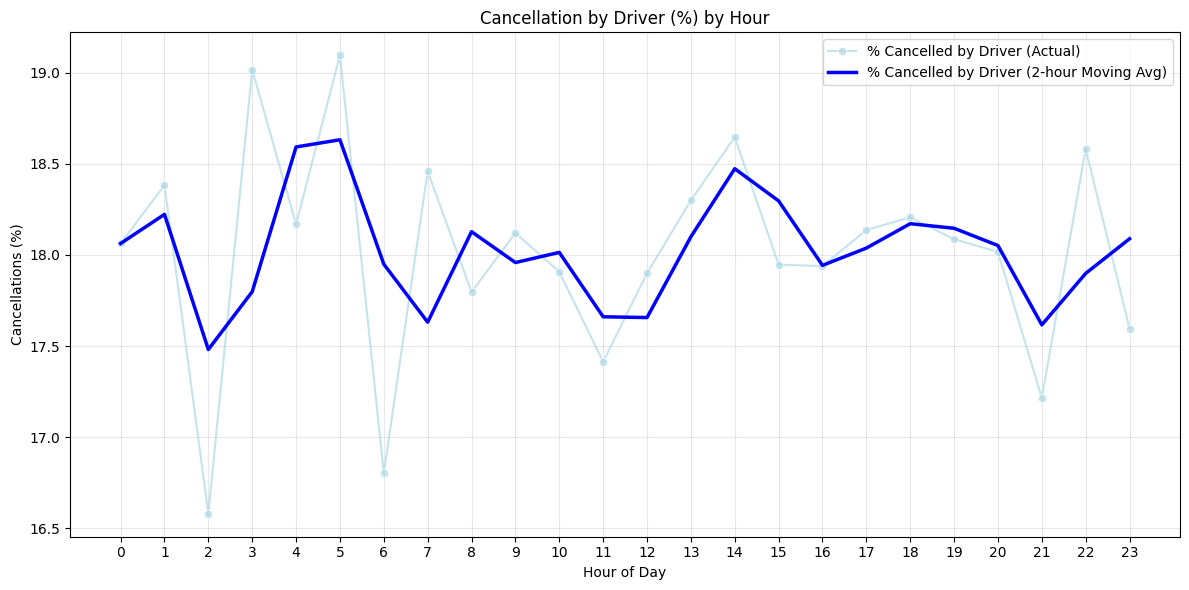

In [17]:
# Define hours range and calculate total bookings per hour
hour_counts = df['Hour'].value_counts().reindex(range(24), fill_value=0)

# Create figure and plot cancellation rates
fig, ax = plt.subplots(figsize=(12, 6))

status_counts = df[df['Booking Status'] == 'Cancelled by Driver']['Hour'].value_counts().reindex(range(24), fill_value=0)
status_rate = (status_counts / hour_counts.replace(0, np.nan) * 100).fillna(0)

# Calculate moving average (3-hour window for smoothing)
window_size = 2
moving_avg = status_rate.rolling(window=window_size, center=True, min_periods=1).mean()

# Plot original data and smoothed line
sns.lineplot(x=status_rate.index, y=status_rate.values, marker='o', 
             label="% Cancelled by Driver (Actual)", color='lightblue', alpha=0.7, ax=ax)

sns.lineplot(x=moving_avg.index, y=moving_avg.values, 
             label=f"% Cancelled by Driver ({window_size}-hour Moving Avg)", color='blue', linewidth=2.5, ax=ax)

# Customize plot
ax.set(xlabel="Hour of Day", ylabel="Cancellations (%)", 
       title="Cancellation by Driver (%) by Hour", xticks=range(24))
ax.grid(True, alpha=0.3)
ax.legend(loc="upper right", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

### Cancellation types Rate Analysis by Hour

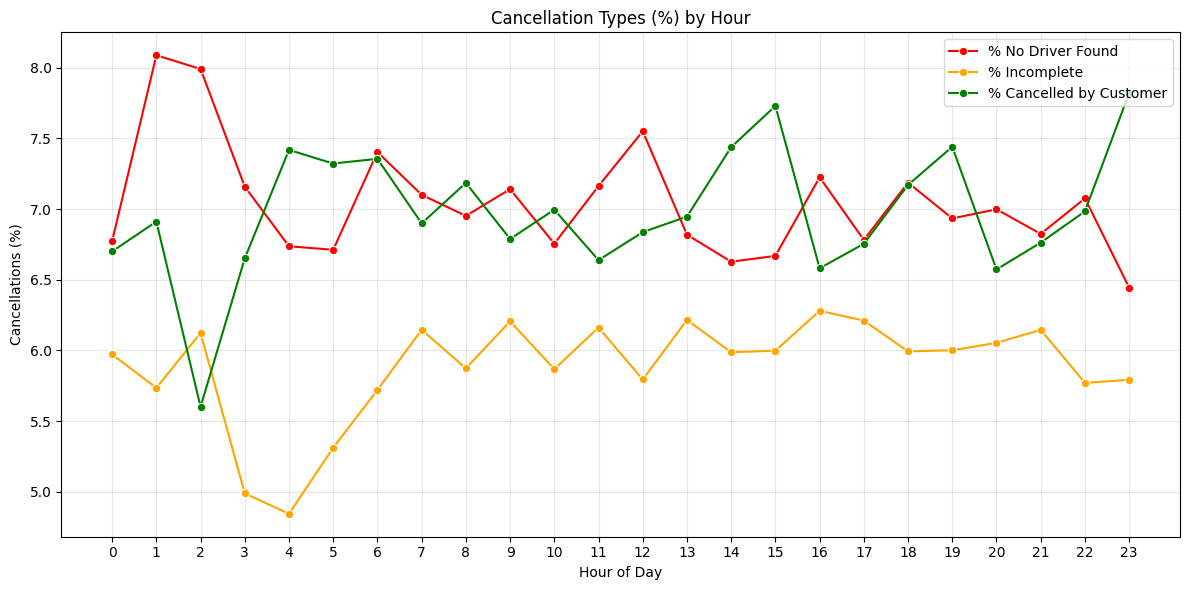

In [18]:
# Define the cancellation types
cancellation_types = {
    'No Driver Found': 'red',
    'Incomplete': 'orange',
    'Cancelled by Customer': 'green'
}


# Create the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate and plot each cancellation type
for status, color in cancellation_types.items():
    # Filter data for this booking status
    status_df = df[df['Booking Status'] == status]
    
    # Count cancellations per hour
    status_counts = status_df['Hour'].value_counts().reindex(range(24), fill_value=0)
    
    # Compute percentage cancellations
    status_rate = (status_counts / hour_counts.replace(0, np.nan) * 100).fillna(0)
    
    # Plot the line
    sns.lineplot(x=status_rate.index, y=status_rate.values,
                marker='o', label=f"% {status}", color=color, ax=ax1)

# Customize the plot
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Cancellations (%)")
ax1.set_title("Cancellation Types (%) by Hour")
ax1.set_xticks(range(0, 24))
ax1.grid(True, alpha=0.3)

# Position legend
plt.legend(loc="upper right", bbox_to_anchor=(1, 1))

# Adjust layout and show
plt.tight_layout()
plt.show()

### Weekly Booking Patterns and Driver Cancellation Rates

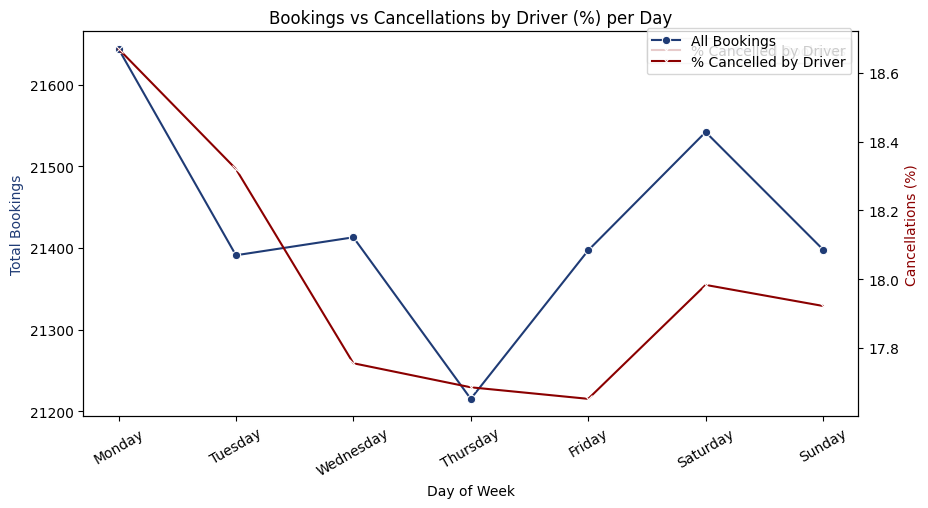

In [19]:
# Define ordered days (so they don't appear randomly)
ordered_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Count total bookings per day
day_counts = df.groupby("Day").size().reindex(ordered_days, fill_value=0)

# Count cancellations by driver per day
canco = df[df["Booking Status"] == "Cancelled by Driver"].groupby("Day").size().reindex(ordered_days, fill_value=0)

# Compute % cancellations
cancel_rate = (canco / day_counts.replace(0, np.nan) * 100).fillna(0)

# Plot
fig, ax1 = plt.subplots(figsize=(10,5))

# Total bookings
sns.lineplot(x=day_counts.index, y=day_counts.values,
             marker='o', label="All Bookings", color= "#1f3b75", ax=ax1)
ax1.set_xlabel("Day of Week")
ax1.set_ylabel("Total Bookings", color="#1f3b75")

# Cancellation rate
ax2 = ax1.twinx()
sns.lineplot(x=cancel_rate.index, y=cancel_rate.values,
             marker='x', label="% Cancelled by Driver", color="#8b0000", ax=ax2)
ax2.set_ylabel("Cancellations (%)", color="#8b0000")

# Beautify
plt.title("Bookings vs Cancellations by Driver (%) per Day")
ax1.set_xticks(range(0,7))
ax1.set_xticklabels(ordered_days, rotation=30)
fig.legend(loc="upper right", bbox_to_anchor=(0.9,0.9))
plt.show()

### Daily Booking Patterns and Driver Availability

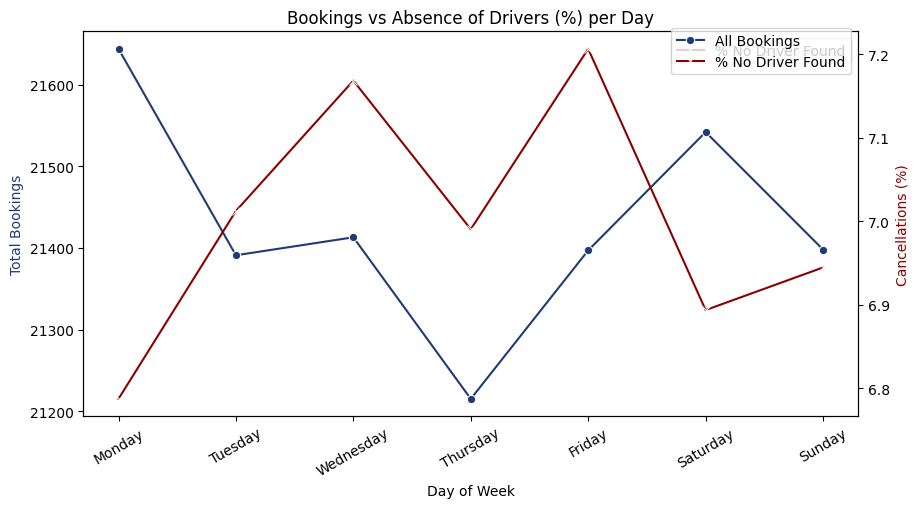

In [21]:
# Count total bookings per day
day_counts = df.groupby("Day").size().reindex(ordered_days, fill_value=0)

# Count cancellations by driver per day
canco = df[df["Booking Status"] == "No Driver Found"].groupby("Day").size().reindex(ordered_days, fill_value=0)

# Compute % cancellations
cancel_rate = (canco / day_counts.replace(0, np.nan) * 100).fillna(0)

# Plot
fig, ax1 = plt.subplots(figsize=(10,5))

# Total bookings
sns.lineplot(x=day_counts.index, y=day_counts.values,
             marker='o', label="All Bookings", color="#1f3b75", ax=ax1)
ax1.set_xlabel("Day of Week")
ax1.set_ylabel("Total Bookings", color="#1f3b75")

# Cancellation rate
ax2 = ax1.twinx()
sns.lineplot(x=cancel_rate.index, y=cancel_rate.values,
             marker='x', label="% No Driver Found", color="#8b0000", ax=ax2)
ax2.set_ylabel("Cancellations (%)", color="#8b0000")

# Beautify
plt.title("Bookings vs Absence of Drivers (%) per Day")
ax1.set_xticks(range(0,7))
ax1.set_xticklabels(ordered_days, rotation=30)
fig.legend(loc="upper right", bbox_to_anchor=(0.9,0.9))
plt.show()

### Destinations with "No Driver Found"

/tmp/ipykernel_2916220/685470553.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_per_location.values, y=mean_per_location.index, palette="deep")


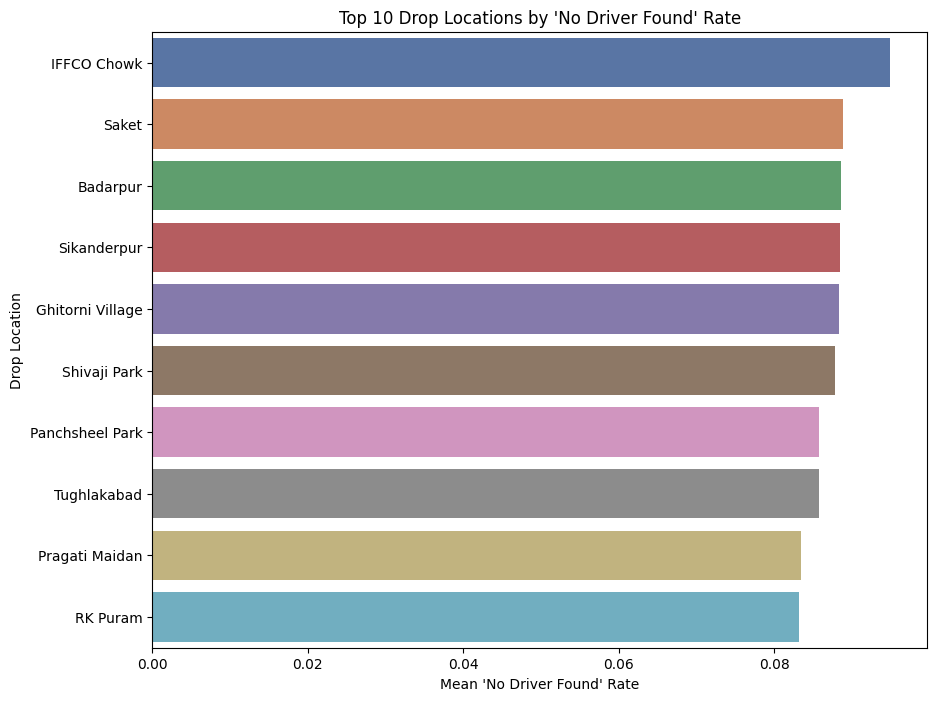

In [22]:
# Create a column that is 1 if 'No Driver Found', else 0
df['No_Driver_Found_Flag'] = (df['Booking Status'].str.strip() == 'No Driver Found').astype(int)

# Compute mean per Drop Location (this gives the rate)
mean_per_location = df.groupby('Drop Location')['No_Driver_Found_Flag'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,8))
sns.barplot(x=mean_per_location.values, y=mean_per_location.index, palette="deep")
plt.xlabel("Mean 'No Driver Found' Rate")
plt.ylabel("Drop Location")
plt.title("Top 10 Drop Locations by 'No Driver Found' Rate")
plt.show()

###  Top 10 Drop Locations Mostly Active on Weekend

(37, 5)
Day_Type              Weekday  Weekend  Total  Weekend_Ratio  Weekday_Ratio
Drop Location                                                              
Pulbangash                547      279    826       0.337772       0.662228
Govindpuri                557      280    837       0.334528       0.665472
IIT Delhi                 579      277    856       0.323598       0.676402
Netaji Subhash Place      580      277    857       0.323221       0.676779
Rithala                   580      276    856       0.322430       0.677570


/tmp/ipykernel_2916220/2355515050.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weekend.values, y=top_weekend.index, palette="Blues_r")


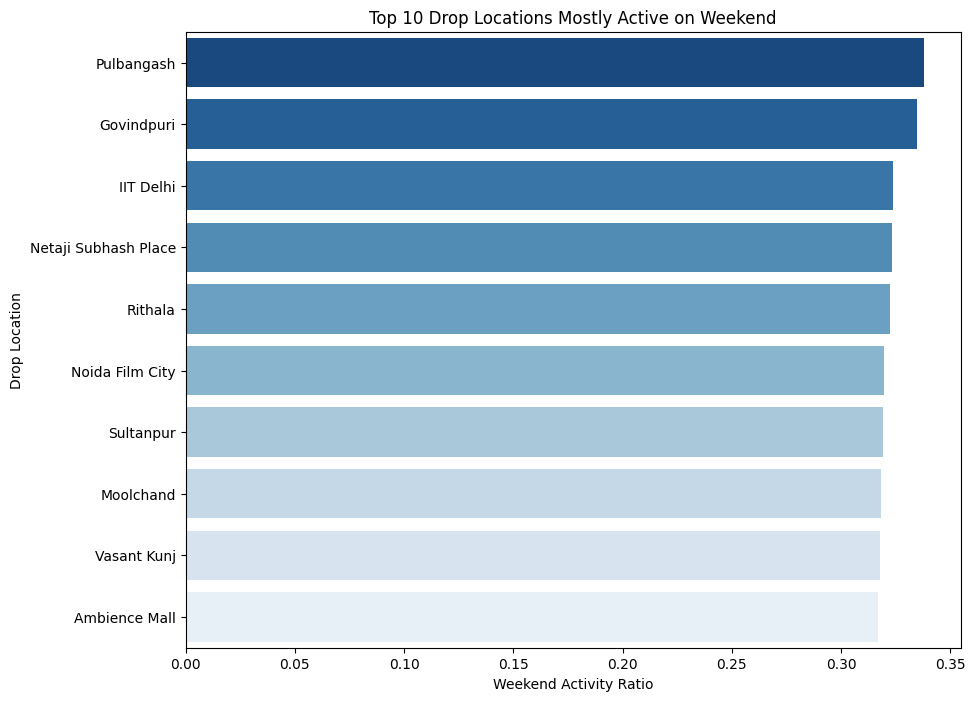

In [23]:
weekend = ['Saturday', 'Sunday']
df['Day_Type'] = df['Day'].apply(lambda x: 'Weekend' if x in weekend else 'Weekday')


location_activity = df.groupby(['Drop Location', 'Day_Type']).size().unstack(fill_value=0)
location_activity['Total'] = location_activity['Weekday'] + location_activity['Weekend']
location_activity['Weekend_Ratio'] = location_activity['Weekend'] / location_activity['Total']
location_activity['Weekday_Ratio'] = location_activity['Weekday'] / location_activity['Total']


# Threshold for "mostly weekend" or "mostly weekday" (e.g., >70%)
mostly_weekend = location_activity[location_activity['Weekend_Ratio'] > 0.3].sort_values(by='Weekend_Ratio', ascending=False)
mostly_weekday = location_activity[location_activity['Weekday_Ratio'] > 0.3].sort_values(by='Weekday_Ratio', ascending=False)

print(mostly_weekend.shape)
print(mostly_weekend.head())


# Top 10 mostly weekend locations
top_weekend = mostly_weekend['Weekend_Ratio'].head(10)

plt.figure(figsize=(10,8))
sns.barplot(x=top_weekend.values, y=top_weekend.index, palette="Blues_r")
plt.xlabel("Weekend Activity Ratio")
plt.ylabel("Drop Location")
plt.title("Top 10 Drop Locations Mostly Active on Weekend")
plt.show()

### Top 10 Drop Locations Mostly Active on Weekdays

(176, 5)
Day_Type          Weekday  Weekend  Total  Weekend_Ratio  Weekday_Ratio
Drop Location                                                          
Huda City Centre      581      193    774       0.249354       0.750646
Kaushambi             644      215    859       0.250291       0.749709
Hauz Khas             667      225    892       0.252242       0.747758
Kirti Nagar           614      213    827       0.257557       0.742443
Subhash Chowk         603      212    815       0.260123       0.739877


/tmp/ipykernel_2916220/189515955.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weekday.values, y=top_weekday.index, palette="Blues_r")


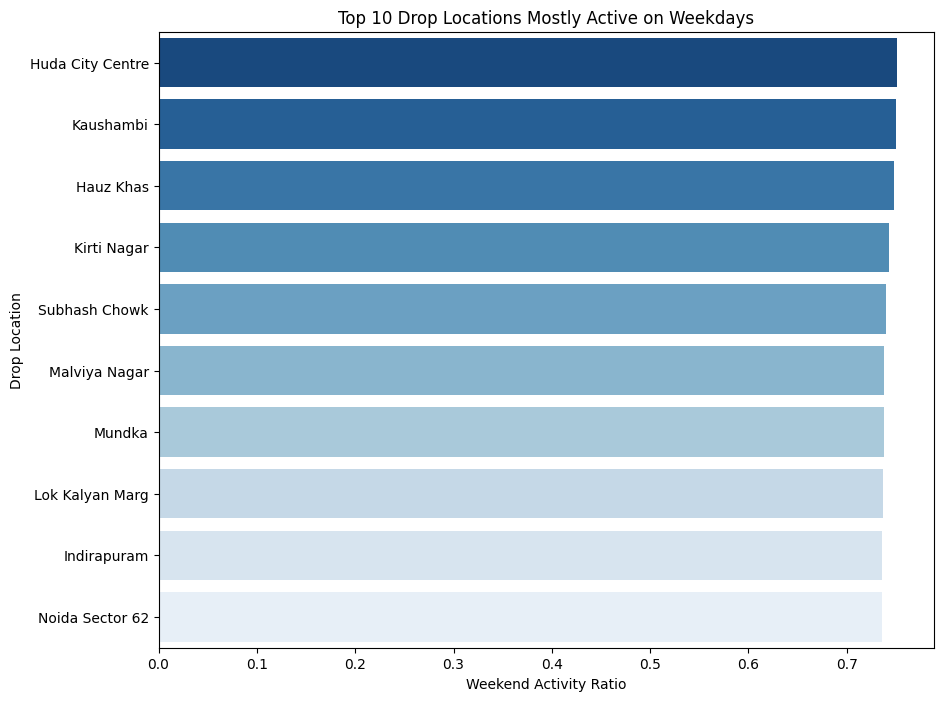

In [24]:
print(mostly_weekday.shape)
print(mostly_weekday.head())


# Top 10 mostly weekend locations
top_weekday = mostly_weekday['Weekday_Ratio'].head(10)

plt.figure(figsize=(10,8))
sns.barplot(x=top_weekday.values, y=top_weekday.index, palette="Blues_r")
plt.xlabel("Weekend Activity Ratio")
plt.ylabel("Drop Location")
plt.title("Top 10 Drop Locations Mostly Active on Weekdays")
plt.show()

In [25]:
df

,Month,Day,Hour,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,...,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,date_time,No_Driver_Found_Flag,Day_Type
122017,1,Monday,0,2024-01-01,00:19:34,"""CNR4352144""",Completed,"""CID8362794""",Bike,Udyog Vihar,...,NaN,NaN,99.0,37.98,4.8,4.8,Cash,2024-01-01 00:19:34,0,Weekday
79457,1,Monday,1,2024-01-01,01:35:18,"""CNR9147645""",Completed,"""CID8300238""",Go Mini,Basai Dhankot,...,NaN,NaN,114.0,39.29,4.2,4.1,Uber Wallet,2024-01-01 01:35:18,0,Weekday
19130,1,Monday,1,2024-01-01,01:37:50,"""CNR1009222""",Cancelled by Driver,"""CID2030746""",Go Sedan,Tughlakabad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:37:50,0,Weekday
47361,1,Monday,1,2024-01-01,01:48:03,"""CNR2740479""",Cancelled by Driver,"""CID3231181""",Auto,Palam Vihar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:48:03,0,Weekday
33452,1,Monday,1,2024-01-01,01:49:56,"""CNR7650148""",Cancelled by Driver,"""CID3381661""",Go Sedan,Narsinghpur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:49:56,0,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37673,12,Monday,22,2024-12-30,22:58:00,"""CNR9030698""",Completed,"""CID6939658""",Bike,DLF Phase 3,...,NaN,NaN,440.0,12.85,4.4,4.8,UPI,2024-12-30 22:58:00,0,Weekday
61365,12,Monday,23,2024-12-30,23:03:14,"""CNR1507833""",Completed,"""CID9905090""",eBike,Saket,...,NaN,NaN,279.0,39.36,3.8,4.3,UPI,2024-12-30 23:03:14,0,Weekday
2518,12,Monday,23,2024-12-30,23:17:05,"""CNR2265113""",Completed,"""CID4170406""",Go Mini,GTB Nagar,...,NaN,NaN,1855.0,38.91,4.3,4.6,UPI,2024-12-30 23:17:05,0,Weekday
88884,12,Monday,23,2024-12-30,23:21:12,"""CNR4066733""",Completed,"""CID8938559""",Uber XL,Ashram,...,NaN,NaN,520.0,36.37,5.0,4.3,Uber Wallet,2024-12-30 23:21:12,0,Weekday


In [27]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 40.2 MB/s eta 0:00:00m eta 0:00:010:01:01


In [28]:
import xgboost as xgb

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [61]:
df_feat_imp = df.copy()
df_feat_imp

,Month,Day,Hour,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,...,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,date_time,No_Driver_Found_Flag,Day_Type
122017,1,Monday,0,2024-01-01,00:19:34,"""CNR4352144""",Completed,"""CID8362794""",Bike,Udyog Vihar,...,NaN,NaN,99.0,37.98,4.8,4.8,Cash,2024-01-01 00:19:34,0,Weekday
79457,1,Monday,1,2024-01-01,01:35:18,"""CNR9147645""",Completed,"""CID8300238""",Go Mini,Basai Dhankot,...,NaN,NaN,114.0,39.29,4.2,4.1,Uber Wallet,2024-01-01 01:35:18,0,Weekday
19130,1,Monday,1,2024-01-01,01:37:50,"""CNR1009222""",Cancelled by Driver,"""CID2030746""",Go Sedan,Tughlakabad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:37:50,0,Weekday
47361,1,Monday,1,2024-01-01,01:48:03,"""CNR2740479""",Cancelled by Driver,"""CID3231181""",Auto,Palam Vihar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:48:03,0,Weekday
33452,1,Monday,1,2024-01-01,01:49:56,"""CNR7650148""",Cancelled by Driver,"""CID3381661""",Go Sedan,Narsinghpur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:49:56,0,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37673,12,Monday,22,2024-12-30,22:58:00,"""CNR9030698""",Completed,"""CID6939658""",Bike,DLF Phase 3,...,NaN,NaN,440.0,12.85,4.4,4.8,UPI,2024-12-30 22:58:00,0,Weekday
61365,12,Monday,23,2024-12-30,23:03:14,"""CNR1507833""",Completed,"""CID9905090""",eBike,Saket,...,NaN,NaN,279.0,39.36,3.8,4.3,UPI,2024-12-30 23:03:14,0,Weekday
2518,12,Monday,23,2024-12-30,23:17:05,"""CNR2265113""",Completed,"""CID4170406""",Go Mini,GTB Nagar,...,NaN,NaN,1855.0,38.91,4.3,4.6,UPI,2024-12-30 23:17:05,0,Weekday
88884,12,Monday,23,2024-12-30,23:21:12,"""CNR4066733""",Completed,"""CID8938559""",Uber XL,Ashram,...,NaN,NaN,520.0,36.37,5.0,4.3,Uber Wallet,2024-12-30 23:21:12,0,Weekday


In [62]:
def get_time_slot(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

In [63]:
df_feat_imp['time_slot'] = df_feat_imp['Hour'].apply(get_time_slot)
df_feat_imp

,Month,Day,Hour,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,date_time,No_Driver_Found_Flag,Day_Type,time_slot
122017,1,Monday,0,2024-01-01,00:19:34,"""CNR4352144""",Completed,"""CID8362794""",Bike,Udyog Vihar,...,NaN,99.0,37.98,4.8,4.8,Cash,2024-01-01 00:19:34,0,Weekday,Night
79457,1,Monday,1,2024-01-01,01:35:18,"""CNR9147645""",Completed,"""CID8300238""",Go Mini,Basai Dhankot,...,NaN,114.0,39.29,4.2,4.1,Uber Wallet,2024-01-01 01:35:18,0,Weekday,Night
19130,1,Monday,1,2024-01-01,01:37:50,"""CNR1009222""",Cancelled by Driver,"""CID2030746""",Go Sedan,Tughlakabad,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:37:50,0,Weekday,Night
47361,1,Monday,1,2024-01-01,01:48:03,"""CNR2740479""",Cancelled by Driver,"""CID3231181""",Auto,Palam Vihar,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:48:03,0,Weekday,Night
33452,1,Monday,1,2024-01-01,01:49:56,"""CNR7650148""",Cancelled by Driver,"""CID3381661""",Go Sedan,Narsinghpur,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:49:56,0,Weekday,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37673,12,Monday,22,2024-12-30,22:58:00,"""CNR9030698""",Completed,"""CID6939658""",Bike,DLF Phase 3,...,NaN,440.0,12.85,4.4,4.8,UPI,2024-12-30 22:58:00,0,Weekday,Evening
61365,12,Monday,23,2024-12-30,23:03:14,"""CNR1507833""",Completed,"""CID9905090""",eBike,Saket,...,NaN,279.0,39.36,3.8,4.3,UPI,2024-12-30 23:03:14,0,Weekday,Evening
2518,12,Monday,23,2024-12-30,23:17:05,"""CNR2265113""",Completed,"""CID4170406""",Go Mini,GTB Nagar,...,NaN,1855.0,38.91,4.3,4.6,UPI,2024-12-30 23:17:05,0,Weekday,Evening
88884,12,Monday,23,2024-12-30,23:21:12,"""CNR4066733""",Completed,"""CID8938559""",Uber XL,Ashram,...,NaN,520.0,36.37,5.0,4.3,Uber Wallet,2024-12-30 23:21:12,0,Weekday,Evening


rush hour? based on our heatmap you can see during weekdays and even weekend, the rush hour is counted over 1200 bookings over that hour 
9 - 11AM and 3-9PM are peak time in India.

In [64]:
def is_rush_hour(hour):
    # rush: 9-11 AM and 3-9 PM (everyday)
    return 1 if (9 <= hour <= 11) or (15 <= hour <= 21) else 0
    

In [65]:
df_feat_imp['is_rush_hour'] = df_feat_imp.apply(lambda x: is_rush_hour(x['Hour']), axis=1)
df_feat_imp

,Month,Day,Hour,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,date_time,No_Driver_Found_Flag,Day_Type,time_slot,is_rush_hour
122017,1,Monday,0,2024-01-01,00:19:34,"""CNR4352144""",Completed,"""CID8362794""",Bike,Udyog Vihar,...,99.0,37.98,4.8,4.8,Cash,2024-01-01 00:19:34,0,Weekday,Night,0
79457,1,Monday,1,2024-01-01,01:35:18,"""CNR9147645""",Completed,"""CID8300238""",Go Mini,Basai Dhankot,...,114.0,39.29,4.2,4.1,Uber Wallet,2024-01-01 01:35:18,0,Weekday,Night,0
19130,1,Monday,1,2024-01-01,01:37:50,"""CNR1009222""",Cancelled by Driver,"""CID2030746""",Go Sedan,Tughlakabad,...,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:37:50,0,Weekday,Night,0
47361,1,Monday,1,2024-01-01,01:48:03,"""CNR2740479""",Cancelled by Driver,"""CID3231181""",Auto,Palam Vihar,...,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:48:03,0,Weekday,Night,0
33452,1,Monday,1,2024-01-01,01:49:56,"""CNR7650148""",Cancelled by Driver,"""CID3381661""",Go Sedan,Narsinghpur,...,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:49:56,0,Weekday,Night,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37673,12,Monday,22,2024-12-30,22:58:00,"""CNR9030698""",Completed,"""CID6939658""",Bike,DLF Phase 3,...,440.0,12.85,4.4,4.8,UPI,2024-12-30 22:58:00,0,Weekday,Evening,0
61365,12,Monday,23,2024-12-30,23:03:14,"""CNR1507833""",Completed,"""CID9905090""",eBike,Saket,...,279.0,39.36,3.8,4.3,UPI,2024-12-30 23:03:14,0,Weekday,Evening,0
2518,12,Monday,23,2024-12-30,23:17:05,"""CNR2265113""",Completed,"""CID4170406""",Go Mini,GTB Nagar,...,1855.0,38.91,4.3,4.6,UPI,2024-12-30 23:17:05,0,Weekday,Evening,0
88884,12,Monday,23,2024-12-30,23:21:12,"""CNR4066733""",Completed,"""CID8938559""",Uber XL,Ashram,...,520.0,36.37,5.0,4.3,Uber Wallet,2024-12-30 23:21:12,0,Weekday,Evening,0


In [37]:
df_feat_imp[df_feat_imp['is_rush_hour'] == 1]

,Month,Day,Hour,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,date_time,No_Driver_Found_Flag,Day_Type,time_slot,is_rush_hour
8219,1,Monday,9,2024-01-01,09:02:16,"""CNR7743565""",Completed,"""CID2074867""",Auto,Pitampura,...,654.0,40.48,4.1,4.1,Debit Card,2024-01-01 09:02:16,0,Weekday,Morning,1
31607,1,Monday,9,2024-01-01,09:02:47,"""CNR1477170""",Completed,"""CID1948638""",Go Mini,Vishwavidyalaya,...,753.0,27.56,4.2,4.7,UPI,2024-01-01 09:02:47,0,Weekday,Morning,1
120345,1,Monday,9,2024-01-01,09:02:58,"""CNR3500529""",Completed,"""CID9086976""",Bike,Ashok Park Main,...,268.0,3.26,4.1,4.3,UPI,2024-01-01 09:02:58,0,Weekday,Morning,1
100892,1,Monday,9,2024-01-01,09:09:17,"""CNR4981244""",Incomplete,"""CID5816241""",Bike,Gurgaon Sector 29,...,197.0,16.10,NaN,NaN,UPI,2024-01-01 09:09:17,0,Weekday,Morning,1
86299,1,Monday,9,2024-01-01,09:09:50,"""CNR9218883""",No Driver Found,"""CID3071295""",Auto,Ramesh Nagar,...,NaN,NaN,NaN,NaN,NaN,2024-01-01 09:09:50,1,Weekday,Morning,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80043,12,Monday,21,2024-12-30,21:41:22,"""CNR2730511""",No Driver Found,"""CID5504239""",Premier Sedan,Panchsheel Park,...,NaN,NaN,NaN,NaN,NaN,2024-12-30 21:41:22,1,Weekday,Evening,1
26684,12,Monday,21,2024-12-30,21:54:52,"""CNR6301265""",Cancelled by Driver,"""CID7970478""",Bike,Dwarka Mor,...,NaN,NaN,NaN,NaN,NaN,2024-12-30 21:54:52,0,Weekday,Evening,1
2545,12,Monday,21,2024-12-30,21:58:10,"""CNR8609901""",Completed,"""CID5531817""",Auto,Vasant Kunj,...,734.0,10.60,4.1,4.7,Cash,2024-12-30 21:58:10,0,Weekday,Evening,1
32020,12,Monday,21,2024-12-30,21:58:33,"""CNR8682276""",Completed,"""CID8882661""",Go Sedan,Vasant Kunj,...,1391.0,8.86,4.3,4.3,Credit Card,2024-12-30 21:58:33,0,Weekday,Evening,1


In [ ]:
# df_feat_imp.to_csv("data_sci_2025/df_feat_imp.csv", index=False)

In [38]:
df_feat_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 122017 to 26151
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Month                              150000 non-null  int32         
 1   Day                                150000 non-null  object        
 2   Hour                               150000 non-null  int32         
 3   Date                               150000 non-null  object        
 4   Time                               150000 non-null  object        
 5   Booking ID                         150000 non-null  object        
 6   Booking Status                     150000 non-null  object        
 7   Customer ID                        150000 non-null  object        
 8   Vehicle Type                       150000 non-null  object        
 9   Pickup Location                    150000 non-null  object        
 10  Drop Location        

# The current data tells us:
"At 12:29, someone booked a ride" ← Individual event

# But you need to predict:
"At 12:00-13:00, how many people will book rides?" ← Aggregated demand

In [44]:
df_feat_imp["Booking Status"].unique()


array(['Completed', 'Cancelled by Driver', 'No Driver Found',
       'Cancelled by Customer', 'Incomplete'], dtype=object)

In [66]:
def create_service_fail(row):
    """
    Create service_fail flag based on multiple criteria:
    - Poor ratings (< 3.0)
    - Cancellations  
    - No driver found
    - Incomplete rides
    """
    # Check booking status failures
    if row['Booking Status'] in ['No Driver Found', 'Incomplete']:
        return 1
    
    # Check rating failures (if ratings exist and are low)
    if pd.notna(row['Driver Ratings']) and row['Driver Ratings'] < 3.0:
        return 1
    
    # Check no driver found flag
    if row['No_Driver_Found_Flag'] == 1:
        return 1
    
    # Return 0 if service was successful
    return 0

In [67]:
df_feat_imp['is_service_failed'] = df_feat_imp.apply(create_service_fail, axis=1)
df_feat_imp

,Month,Day,Hour,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,...,Ride Distance,Driver Ratings,Customer Rating,Payment Method,date_time,No_Driver_Found_Flag,Day_Type,time_slot,is_rush_hour,is_service_failed
122017,1,Monday,0,2024-01-01,00:19:34,"""CNR4352144""",Completed,"""CID8362794""",Bike,Udyog Vihar,...,37.98,4.8,4.8,Cash,2024-01-01 00:19:34,0,Weekday,Night,0,0
79457,1,Monday,1,2024-01-01,01:35:18,"""CNR9147645""",Completed,"""CID8300238""",Go Mini,Basai Dhankot,...,39.29,4.2,4.1,Uber Wallet,2024-01-01 01:35:18,0,Weekday,Night,0,0
19130,1,Monday,1,2024-01-01,01:37:50,"""CNR1009222""",Cancelled by Driver,"""CID2030746""",Go Sedan,Tughlakabad,...,NaN,NaN,NaN,NaN,2024-01-01 01:37:50,0,Weekday,Night,0,0
47361,1,Monday,1,2024-01-01,01:48:03,"""CNR2740479""",Cancelled by Driver,"""CID3231181""",Auto,Palam Vihar,...,NaN,NaN,NaN,NaN,2024-01-01 01:48:03,0,Weekday,Night,0,0
33452,1,Monday,1,2024-01-01,01:49:56,"""CNR7650148""",Cancelled by Driver,"""CID3381661""",Go Sedan,Narsinghpur,...,NaN,NaN,NaN,NaN,2024-01-01 01:49:56,0,Weekday,Night,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37673,12,Monday,22,2024-12-30,22:58:00,"""CNR9030698""",Completed,"""CID6939658""",Bike,DLF Phase 3,...,12.85,4.4,4.8,UPI,2024-12-30 22:58:00,0,Weekday,Evening,0,0
61365,12,Monday,23,2024-12-30,23:03:14,"""CNR1507833""",Completed,"""CID9905090""",eBike,Saket,...,39.36,3.8,4.3,UPI,2024-12-30 23:03:14,0,Weekday,Evening,0,0
2518,12,Monday,23,2024-12-30,23:17:05,"""CNR2265113""",Completed,"""CID4170406""",Go Mini,GTB Nagar,...,38.91,4.3,4.6,UPI,2024-12-30 23:17:05,0,Weekday,Evening,0,0
88884,12,Monday,23,2024-12-30,23:21:12,"""CNR4066733""",Completed,"""CID8938559""",Uber XL,Ashram,...,36.37,5.0,4.3,Uber Wallet,2024-12-30 23:21:12,0,Weekday,Evening,0,0


In [68]:
print(f"Service Fail Distribution:")
print(df_feat_imp['is_service_failed'].value_counts())
print(f"Service Fail Rate: {df_feat_imp['is_service_failed'].mean()*100:.5f}%")

Service Fail Distribution:
is_service_failed
0    130500
1     19500
Name: count, dtype: int64
Service Fail Rate: 13.00000%


In [69]:
fail_counts = df_feat_imp['is_service_failed'].value_counts()

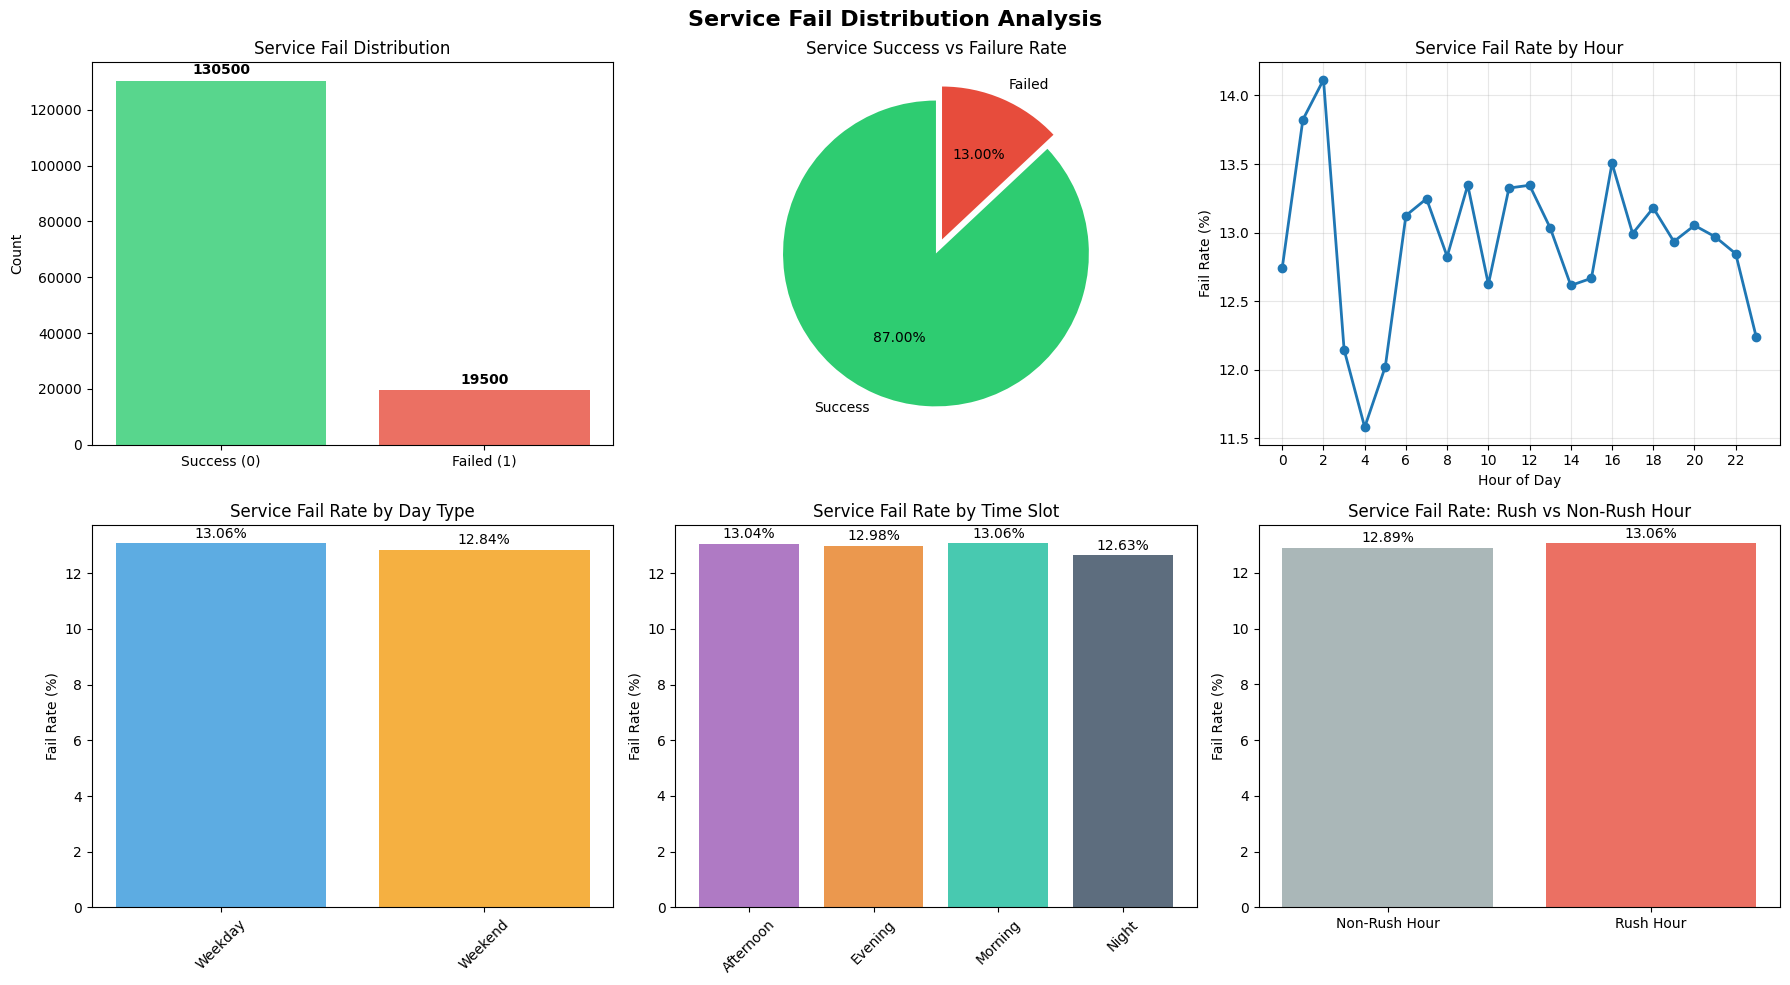

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Service Fail Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Basic Bar Chart
axes[0, 0].bar(['Success (0)', 'Failed (1)'], fail_counts.values, 
               color=['#2ecc71', '#e74c3c'], alpha=0.8)
axes[0, 0].set_title('Service Fail Distribution')
axes[0, 0].set_ylabel('Count')
for i, v in enumerate(fail_counts.values):
    axes[0, 0].text(i, v + max(fail_counts.values)*0.01, str(v), 
                    ha='center', va='bottom', fontweight='bold')

# 2. Pie Chart
colors = ['#2ecc71', '#e74c3c']
labels = ['Success', 'Failed']
axes[0, 1].pie(fail_counts.values, labels=labels, colors=colors, autopct='%1.2f%%', 
               startangle=90, explode=(0, 0.1))
axes[0, 1].set_title('Service Success vs Failure Rate')

# 3. Service Fail by Hour
hourly_fail = df_feat_imp.groupby('Hour')['is_service_failed'].agg(['mean', 'count']).reset_index()
axes[0, 2].plot(hourly_fail['Hour'], hourly_fail['mean']*100, marker='o', linewidth=2, markersize=6)
axes[0, 2].set_title('Service Fail Rate by Hour')
axes[0, 2].set_xlabel('Hour of Day')
axes[0, 2].set_ylabel('Fail Rate (%)')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].set_xticks(range(0, 24, 2))

# 4. Service Fail by Day Type
day_fail = df_feat_imp.groupby('Day_Type')['is_service_failed'].agg(['mean', 'count']).reset_index()
bars = axes[1, 0].bar(day_fail['Day_Type'], day_fail['mean']*100, 
                      color=['#3498db', '#f39c12'], alpha=0.8)
axes[1, 0].set_title('Service Fail Rate by Day Type')
axes[1, 0].set_ylabel('Fail Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
for bar, rate in zip(bars, day_fail['mean']*100):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{rate:.2f}%', ha='center', va='bottom')

# 5. Service Fail by Time Slot
timeslot_fail = df_feat_imp.groupby('time_slot')['is_service_failed'].agg(['mean', 'count']).reset_index()
bars = axes[1, 1].bar(timeslot_fail['time_slot'], timeslot_fail['mean']*100, 
                      color=['#9b59b6', '#e67e22', '#1abc9c', '#34495e'], alpha=0.8)
axes[1, 1].set_title('Service Fail Rate by Time Slot')
axes[1, 1].set_ylabel('Fail Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
for bar, rate in zip(bars, timeslot_fail['mean']*100):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{rate:.2f}%', ha='center', va='bottom')

# 6. Service Fail by Rush Hour
rushhour_fail = df_feat_imp.groupby('is_rush_hour')['is_service_failed'].agg(['mean', 'count']).reset_index()
rushhour_fail['rush_label'] = rushhour_fail['is_rush_hour'].map({0: 'Non-Rush Hour', 1: 'Rush Hour'})
bars = axes[1, 2].bar(rushhour_fail['rush_label'], rushhour_fail['mean']*100, 
                      color=['#95a5a6', '#e74c3c'], alpha=0.8)
axes[1, 2].set_title('Service Fail Rate: Rush vs Non-Rush Hour')
axes[1, 2].set_ylabel('Fail Rate (%)')
for bar, rate in zip(bars, rushhour_fail['mean']*100):
    axes[1, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{rate:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

service fail = demand >>> supply so at night 1AM there's more chance of service fail

overall it's unpredictable.. weekend vs weekday , time slot , rush hour or not are the same..no difference

so we need to separate poor rating from service fail

In [ ]:
# df_feat_imp.to_csv("data_sci_2025/df_feat_imp.csv", index=False)

In [171]:
df_feat_imp = df.copy()

In [172]:
df_feat_imp['time_slot'] = df_feat_imp['Hour'].apply(get_time_slot)
df_feat_imp['is_rush_hour'] = df_feat_imp.apply(lambda x: is_rush_hour(x['Hour']), axis=1)

In [173]:
def create_service_fail(row):
    """
    Create service_fail flag based on multiple criteria:
    - Cancellations  
    - No driver found
    - Incomplete rides
    """
    # Check booking status failures
    # incomplete = 'customer demands', 'vehicle breakdown', 'other issue'
    if row['Booking Status'] in ['No Driver Found', 'Incomplete']:
        return 1
    
    # # Check rating failures (if ratings exist and are low)
    # if pd.notna(row['Driver Ratings']) and row['Driver Ratings'] < 3.0:
    #     return 1
    # Check customer cancellation with specific reasons
    if (pd.notna(row['Reason for cancelling by Customer']) and 
        row['Reason for cancelling by Customer'] in ['Driver ain\'t moving towards pickup point', 'AC is not working']):
        return 1
    # Check no driver found flag
    if row['No_Driver_Found_Flag'] == 1:
        return 1
    
    # Return 0 if service was successful
    return 0 if not pd.isna(row['Booking Status']) else np.nan

In [ ]:
# def is_poor_rating(rating):
#     if pd.notna(rating) and rating < 3.0:
#         return 1
#     return 0

In [174]:
df_feat_imp['is_service_failed'] = df_feat_imp.apply(create_service_fail, axis=1)
# df_feat_imp['is_rating_poor'] = df_feat_imp['Driver Ratings'].apply(is_poor_rating)
df_feat_imp

,Month,Day,Hour,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,...,Ride Distance,Driver Ratings,Customer Rating,Payment Method,date_time,No_Driver_Found_Flag,Day_Type,time_slot,is_rush_hour,is_service_failed
122017,1,Monday,0,2024-01-01,00:19:34,"""CNR4352144""",Completed,"""CID8362794""",Bike,Udyog Vihar,...,37.98,4.8,4.8,Cash,2024-01-01 00:19:34,0,Weekday,Night,0,0
79457,1,Monday,1,2024-01-01,01:35:18,"""CNR9147645""",Completed,"""CID8300238""",Go Mini,Basai Dhankot,...,39.29,4.2,4.1,Uber Wallet,2024-01-01 01:35:18,0,Weekday,Night,0,0
19130,1,Monday,1,2024-01-01,01:37:50,"""CNR1009222""",Cancelled by Driver,"""CID2030746""",Go Sedan,Tughlakabad,...,NaN,NaN,NaN,NaN,2024-01-01 01:37:50,0,Weekday,Night,0,0
47361,1,Monday,1,2024-01-01,01:48:03,"""CNR2740479""",Cancelled by Driver,"""CID3231181""",Auto,Palam Vihar,...,NaN,NaN,NaN,NaN,2024-01-01 01:48:03,0,Weekday,Night,0,0
33452,1,Monday,1,2024-01-01,01:49:56,"""CNR7650148""",Cancelled by Driver,"""CID3381661""",Go Sedan,Narsinghpur,...,NaN,NaN,NaN,NaN,2024-01-01 01:49:56,0,Weekday,Night,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37673,12,Monday,22,2024-12-30,22:58:00,"""CNR9030698""",Completed,"""CID6939658""",Bike,DLF Phase 3,...,12.85,4.4,4.8,UPI,2024-12-30 22:58:00,0,Weekday,Evening,0,0
61365,12,Monday,23,2024-12-30,23:03:14,"""CNR1507833""",Completed,"""CID9905090""",eBike,Saket,...,39.36,3.8,4.3,UPI,2024-12-30 23:03:14,0,Weekday,Evening,0,0
2518,12,Monday,23,2024-12-30,23:17:05,"""CNR2265113""",Completed,"""CID4170406""",Go Mini,GTB Nagar,...,38.91,4.3,4.6,UPI,2024-12-30 23:17:05,0,Weekday,Evening,0,0
88884,12,Monday,23,2024-12-30,23:21:12,"""CNR4066733""",Completed,"""CID8938559""",Uber XL,Ashram,...,36.37,5.0,4.3,Uber Wallet,2024-12-30 23:21:12,0,Weekday,Evening,0,0


In [92]:
print(df["Driver Ratings"].unique())

[4.8 4.2 nan 4.3 3.6 4.4 4.1 3.8 5.  4.  4.6 4.9 3.  3.9 4.7 3.4 3.3 3.7
 3.2 4.5 3.5 3.1]


In [93]:
print(df["Driver Ratings"].isnull().sum())

57000


In [107]:
print(df_feat_imp['Reason for cancelling by Customer'].unique())
print(df_feat_imp['Incomplete Rides Reason'].unique())
print(df_feat_imp['Driver Cancellation Reason'].unique())

[nan 'Driver asked to cancel'
 'Driver is not moving towards pickup location' 'Wrong Address'
 'Change of plans' 'AC is not working']
[nan 'Customer Demand' 'Vehicle Breakdown' 'Other Issue']
[nan 'More than permitted people in there' 'Personal & Car related issues'
 'The customer was coughing/sick' 'Customer related issue']


In [112]:
df_feat_imp["Booking Status"].isnull().sum()

np.int64(0)

In [114]:
df_feat_imp["Booking Status"].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

In [117]:
# Check null values only for "Cancelled by Customer" bookings
cancelled_by_customer = df_feat_imp[df_feat_imp['Booking Status'] == 'Cancelled by Customer']

print(f"Total 'Cancelled by Customer' bookings: {len(cancelled_by_customer)}")
print(f"Null values in cancellation reason: {cancelled_by_customer['Reason for cancelling by Customer'].isnull().sum()}")
print(f"Non-null cancellation reasons: {cancelled_by_customer['Reason for cancelling by Customer'].notnull().sum()}")



Total 'Cancelled by Customer' bookings: 10500
Null values in cancellation reason: 0
Non-null cancellation reasons: 10500


In [118]:

print(cancelled_by_customer['Reason for cancelling by Customer'].value_counts(dropna=False))

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64


In [105]:
df_feat_imp["is_service_failed"].isnull().sum()

np.int64(0)

In [123]:
print(f"Service Fail Distribution:")
print(df_feat_imp['is_service_failed'].value_counts())
print(f"Service Fail Rate: {df_feat_imp['is_service_failed'].mean()*100:.5f}%")

Service Fail Distribution:
is_service_failed
0    129345
1     20655
Name: count, dtype: int64
Service Fail Rate: 13.77000%


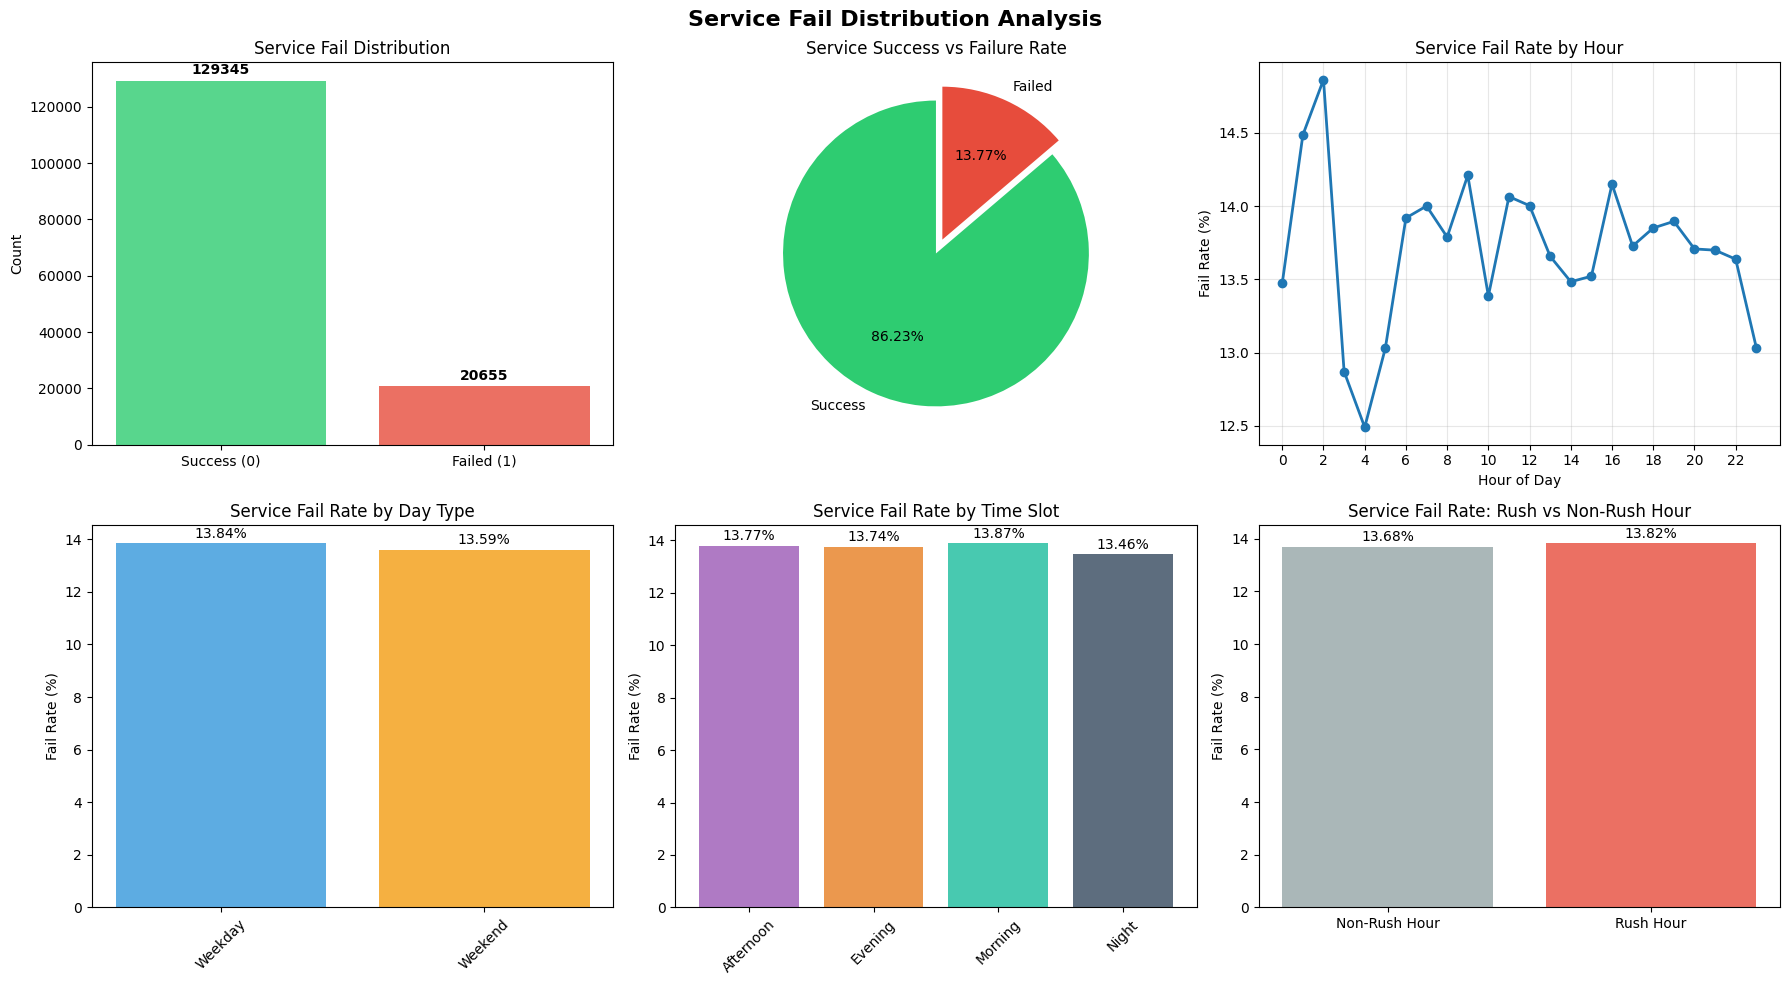

In [124]:
fail_counts = df_feat_imp['is_service_failed'].value_counts()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Service Fail Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Basic Bar Chart
axes[0, 0].bar(['Success (0)', 'Failed (1)'], fail_counts.values, 
               color=['#2ecc71', '#e74c3c'], alpha=0.8)
axes[0, 0].set_title('Service Fail Distribution')
axes[0, 0].set_ylabel('Count')
for i, v in enumerate(fail_counts.values):
    axes[0, 0].text(i, v + max(fail_counts.values)*0.01, str(v), 
                    ha='center', va='bottom', fontweight='bold')

# 2. Pie Chart
colors = ['#2ecc71', '#e74c3c']
labels = ['Success', 'Failed']
axes[0, 1].pie(fail_counts.values, labels=labels, colors=colors, autopct='%1.2f%%', 
               startangle=90, explode=(0, 0.1))
axes[0, 1].set_title('Service Success vs Failure Rate')

# 3. Service Fail by Hour
hourly_fail = df_feat_imp.groupby('Hour')['is_service_failed'].agg(['mean', 'count']).reset_index()
axes[0, 2].plot(hourly_fail['Hour'], hourly_fail['mean']*100, marker='o', linewidth=2, markersize=6)
axes[0, 2].set_title('Service Fail Rate by Hour')
axes[0, 2].set_xlabel('Hour of Day')
axes[0, 2].set_ylabel('Fail Rate (%)')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].set_xticks(range(0, 24, 2))

# 4. Service Fail by Day Type
day_fail = df_feat_imp.groupby('Day_Type')['is_service_failed'].agg(['mean', 'count']).reset_index()
bars = axes[1, 0].bar(day_fail['Day_Type'], day_fail['mean']*100, 
                      color=['#3498db', '#f39c12'], alpha=0.8)
axes[1, 0].set_title('Service Fail Rate by Day Type')
axes[1, 0].set_ylabel('Fail Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
for bar, rate in zip(bars, day_fail['mean']*100):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{rate:.2f}%', ha='center', va='bottom')

# 5. Service Fail by Time Slot
timeslot_fail = df_feat_imp.groupby('time_slot')['is_service_failed'].agg(['mean', 'count']).reset_index()
bars = axes[1, 1].bar(timeslot_fail['time_slot'], timeslot_fail['mean']*100, 
                      color=['#9b59b6', '#e67e22', '#1abc9c', '#34495e'], alpha=0.8)
axes[1, 1].set_title('Service Fail Rate by Time Slot')
axes[1, 1].set_ylabel('Fail Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
for bar, rate in zip(bars, timeslot_fail['mean']*100):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{rate:.2f}%', ha='center', va='bottom')

# 6. Service Fail by Rush Hour
rushhour_fail = df_feat_imp.groupby('is_rush_hour')['is_service_failed'].agg(['mean', 'count']).reset_index()
rushhour_fail['rush_label'] = rushhour_fail['is_rush_hour'].map({0: 'Non-Rush Hour', 1: 'Rush Hour'})
bars = axes[1, 2].bar(rushhour_fail['rush_label'], rushhour_fail['mean']*100, 
                      color=['#95a5a6', '#e74c3c'], alpha=0.8)
axes[1, 2].set_title('Service Fail Rate: Rush vs Non-Rush Hour')
axes[1, 2].set_ylabel('Fail Rate (%)')
for bar, rate in zip(bars, rushhour_fail['mean']*100):
    axes[1, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{rate:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Feature importance

In [129]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [133]:
df_feat_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 122017 to 26151
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Month                              150000 non-null  int32         
 1   Day                                150000 non-null  object        
 2   Hour                               150000 non-null  int32         
 3   Date                               150000 non-null  object        
 4   Time                               150000 non-null  object        
 5   Booking ID                         150000 non-null  object        
 6   Booking Status                     150000 non-null  object        
 7   Customer ID                        150000 non-null  object        
 8   Vehicle Type                       150000 non-null  object        
 9   Pickup Location                    150000 non-null  object        
 10  Drop Location        

In [125]:
print(df_feat_imp.columns.tolist())

# print(df_feat_imp.dtypes)

# print(f"\nDataset shape: {df_feat_imp.shape}")

['Month', 'Day', 'Hour', 'Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method', 'date_time', 'No_Driver_Found_Flag', 'Day_Type', 'time_slot', 'is_rush_hour', 'is_service_failed']


In [175]:
# Select relevant features (exclude IDs, target-related columns, and redundant time features)
# remove booking status cause Data leakage issue due to its direct relation with is_service_failed
remove_cols = ['Booking ID', 'Date', 'Time', 'Customer ID', 'is_service_failed', 'Booking Status','date_time']
all_features = ['Month', 'Day', 'Hour', 'Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method', 'date_time', 'No_Driver_Found_Flag', 'Day_Type', 'time_slot', 'is_rush_hour', 'is_service_failed']
feature_cols = [col for col in df_feat_imp.columns if col not in remove_cols]
print(f"Selected features ({len(feature_cols)}): {feature_cols}")

Selected features (23): ['Month', 'Day', 'Hour', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method', 'No_Driver_Found_Flag', 'Day_Type', 'time_slot', 'is_rush_hour']


In [176]:
X_clf = df_feat_imp[feature_cols].copy()
y_clf = df_feat_imp['is_service_failed']


# Get numerical and categorical columns dynamically
numerical_cols = ['Month', 'Hour', 'Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 
                  'Driver Ratings', 'Customer Rating', 'No_Driver_Found_Flag', 'is_rush_hour', 
                  'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides']

categorical_cols = ['Day', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Payment Method', 
                    'Day_Type', 'time_slot', 'Reason for cancelling by Customer', 
                    'Driver Cancellation Reason', 'Incomplete Rides Reason']
    
# Update missing values handling for new numerical columns
for col in numerical_cols:
    if col in X_clf.columns:
        X_clf[col] = X_clf[col].fillna(X_clf[col].median())

# Handle missing categorical values
for col in categorical_cols:
    if col in X_clf.columns:
        X_clf[col] = X_clf[col].fillna('Unknown')
        le = LabelEncoder()
        X_clf[col] = le.fit_transform(X_clf[col].astype(str))

In [177]:
print(X_clf.dtypes)

Month                                  int32
Day                                    int64
Hour                                   int32
Vehicle Type                           int64
Pickup Location                        int64
Drop Location                          int64
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer      int64
Cancelled Rides by Driver            float64
Driver Cancellation Reason             int64
Incomplete Rides                     float64
Incomplete Rides Reason                int64
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                         int64
No_Driver_Found_Flag                   int64
Day_Type                               int64
time_slot                              int64
is_rush_ho

Classification Feature Importance (Top 10):
                              feature  importance
19               No_Driver_Found_Flag      0.3286
13            Incomplete Rides Reason      0.2466
6                            Avg VTAT      0.0877
7                            Avg CTAT      0.0605
17                    Customer Rating      0.0604
15                      Ride Distance      0.0481
9   Reason for cancelling by Customer      0.0454
16                     Driver Ratings      0.0437
11         Driver Cancellation Reason      0.0386
18                     Payment Method      0.0309


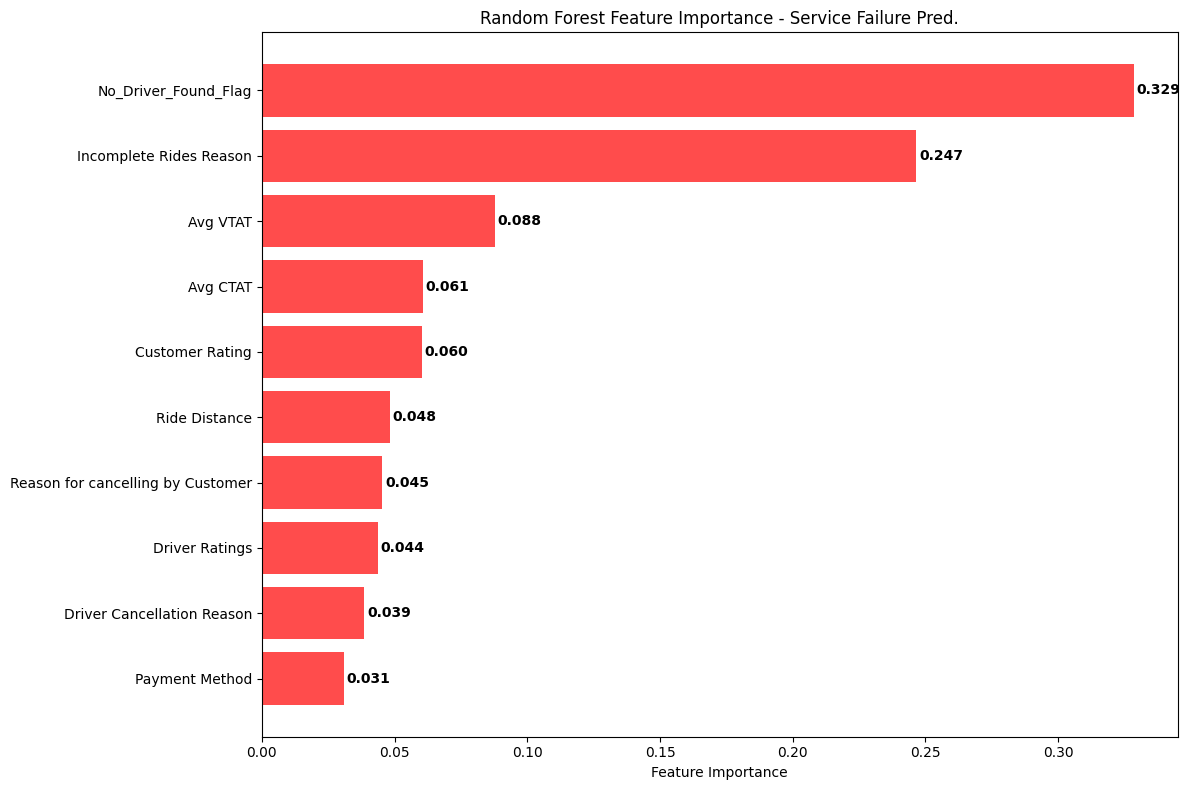

In [178]:
# Random Forest Classification
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_clf.fit(X_clf, y_clf)

clf_importance = pd.DataFrame({
    'feature': X_clf.columns,
    'importance': rf_clf.feature_importances_
}).sort_values('importance', ascending=False)

print("Classification Feature Importance (Top 10):")
print(clf_importance.head(10).round(4))

# Plot Classification Feature Importance
plt.figure(figsize=(12, 8))
top_10_clf = clf_importance.head(10)
bars = plt.barh(range(len(top_10_clf)), top_10_clf['importance'], color='red', alpha=0.7)
plt.yticks(range(len(top_10_clf)), top_10_clf['feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance - Service Failure Pred.')
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{top_10_clf.iloc[i]["importance"]:.3f}', 
             va='center', ha='left', fontweight='bold')
plt.tight_layout()
plt.show()

Examples:

date_time: "2024-03-15 14:35:22" → date_hour: "2024-03-15 14:00:00"
date_time: "2024-03-15 09:47:15" → date_hour: "2024-03-15 09:00:00"

This creates hourly time buckets for aggregating demand counts (how many bookings happened in each location during each hour).

demand count = number of bookings in that hour per pickup location

In [156]:
# ===== REGRESSION: DEMAND FORECASTING =====
# Create demand dataset
df_feat_imp['date_hour'] = pd.to_datetime(df_feat_imp['date_time']).dt.floor('H')

# demand_df = df_feat_imp.groupby(['Pickup Location', 'date_hour']).agg({
#     'Booking ID': 'count',
#     'Hour': 'first',
#     'Day': 'first', 
#     'time_slot': 'first',
#     'is_rush_hour': 'first',
#     'Day_Type': 'first',
#     'Month': 'first'
# }).reset_index()

demand_df = df_feat_imp.groupby(['Pickup Location', 'date_hour']).agg({
    'Booking ID': 'count',
    'Hour': 'first',
    'Day': 'first', 
    'time_slot': 'first',
    'is_rush_hour': 'first',
    'Day_Type': 'first',
    'Month': 'first',
    #add
    'is_service_failed': 'mean',  # Service failure rate per location-hour
    'Booking Value': 'mean',       # Average booking value
    'Ride Distance': 'mean',       # Average ride distance
    'Vehicle Type': lambda x: x.mode().iloc[0] if len(x) > 0 else 'Auto',  # Dominant vehicle
    'Driver Ratings': 'mean',      # Average driver rating
    'Customer Rating': 'mean'      # Average customer rating
    
}).reset_index()

demand_df.rename(columns={'Booking ID': 'demand_count'}, inplace=True)

print(f"Demand dataset: {demand_df.shape}")
print(f"Demand range: {demand_df['demand_count'].min()} - {demand_df['demand_count'].max()}")


/tmp/ipykernel_2916220/1573165607.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_feat_imp['date_hour'] = pd.to_datetime(df_feat_imp['date_time']).dt.floor('H')


Demand dataset: (140925, 15)
Demand range: 1 - 5


In [157]:
demand_df 


,Pickup Location,date_hour,demand_count,Hour,Day,time_slot,is_rush_hour,Day_Type,Month,is_service_failed,Booking Value,Ride Distance,Vehicle Type,Driver Ratings,Customer Rating
0,AIIMS,2024-01-01 14:00:00,1,14,Monday,Afternoon,0,Weekday,1,0.0,969.0,25.34,Go Mini,4.3,4.2
1,AIIMS,2024-01-01 15:00:00,1,15,Monday,Afternoon,1,Weekday,1,0.0,529.0,23.20,Go Mini,4.9,4.2
2,AIIMS,2024-01-01 16:00:00,1,16,Monday,Afternoon,1,Weekday,1,0.0,NaN,NaN,Auto,NaN,NaN
3,AIIMS,2024-01-01 18:00:00,1,18,Monday,Evening,1,Weekday,1,0.0,436.0,3.52,Go Sedan,4.3,4.5
4,AIIMS,2024-01-02 07:00:00,1,7,Tuesday,Morning,0,Weekday,1,0.0,NaN,NaN,Go Mini,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140920,Yamuna Bank,2024-12-29 06:00:00,1,6,Sunday,Morning,0,Weekend,12,1.0,NaN,NaN,Bike,NaN,NaN
140921,Yamuna Bank,2024-12-30 11:00:00,1,11,Monday,Morning,1,Weekday,12,0.0,629.0,9.20,Premier Sedan,4.5,5.0
140922,Yamuna Bank,2024-12-30 17:00:00,1,17,Monday,Afternoon,1,Weekday,12,0.0,452.0,47.94,Auto,4.3,4.1
140923,Yamuna Bank,2024-12-30 19:00:00,1,19,Monday,Evening,1,Weekday,12,0.0,791.0,6.07,Go Mini,4.1,4.0


In [158]:
print("Demand count distribution:")
print(demand_df['demand_count'].value_counts().sort_index().head(10))

print(f"\nLocations with minimum demand (2):")
min_demand = demand_df[demand_df['demand_count'] == 2]
print(f"Count: {len(min_demand)}")

Demand count distribution:
demand_count
1    132283
2      8233
3       387
4        20
5         2
Name: count, dtype: int64

Locations with minimum demand (2):
Count: 8233


In [155]:
min_demand[['Pickup Location', 'date_hour', 'demand_count']].head()

,Pickup Location,date_hour,demand_count
9,AIIMS,2024-01-05 13:00:00,2
24,AIIMS,2024-01-10 09:00:00,2
29,AIIMS,2024-01-11 15:00:00,2
31,AIIMS,2024-01-11 19:00:00,2
34,AIIMS,2024-01-12 17:00:00,2


Regression Feature Importance:
           feature  importance
7    Booking Value      0.3095
8    Ride Distance      0.2394
9     Vehicle Type      0.1566
0  Pickup Location      0.0967
4             Hour      0.0489
3     is_rush_hour      0.0483
6            Month      0.0439
2              Day      0.0339
1        time_slot      0.0116
5         Day_Type      0.0113


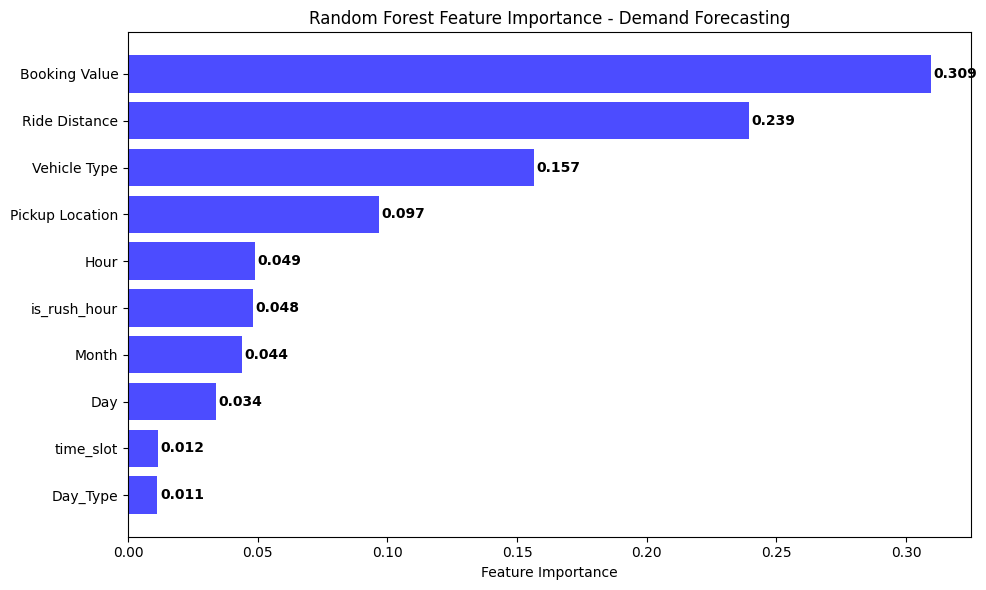

In [163]:
# Regression features (excude service fail related features to avoid leakage)
regression_features = ['Pickup Location', 'time_slot', 'Day', 'is_rush_hour', 'Hour', 'Day_Type', 'Month',
                      'Booking Value', 'Ride Distance', 'Vehicle Type']

X_reg = demand_df[regression_features].copy()
y_reg = demand_df['demand_count']

# Handle missing values for numerical columns
numerical_reg_cols = ['Booking Value', 'Ride Distance', 'Hour', 'Month', 'is_rush_hour']
for col in numerical_reg_cols:
    if col in X_reg.columns:
        X_reg[col] = X_reg[col].fillna(X_reg[col].median())

# Encode categorical variables
categorical_reg_cols = ['Pickup Location', 'time_slot', 'Day', 'Day_Type', 'Vehicle Type']
for col in categorical_reg_cols:
    le = LabelEncoder()
    X_reg[col] = le.fit_transform(X_reg[col].astype(str))

# Train Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_reg.fit(X_reg, y_reg)

reg_importance = pd.DataFrame({
    'feature': X_reg.columns,
    'importance': rf_reg.feature_importances_
}).sort_values('importance', ascending=False)

print("Regression Feature Importance:")
print(reg_importance.round(4))

# Plot Regression Feature Importance
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(reg_importance)), reg_importance['importance'], color='blue', alpha=0.7)
plt.yticks(range(len(reg_importance)), reg_importance['feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance - Demand Forecasting')
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{reg_importance.iloc[i]["importance"]:.3f}', 
             va='center', ha='left', fontweight='bold')
plt.tight_layout()
plt.show()


In [164]:
demand_df["Day_Type"].unique()

array(['Weekday', 'Weekend'], dtype=object)


PEARSON CORRELATION ANALYSIS
Correlation matrix shape: (14, 14)


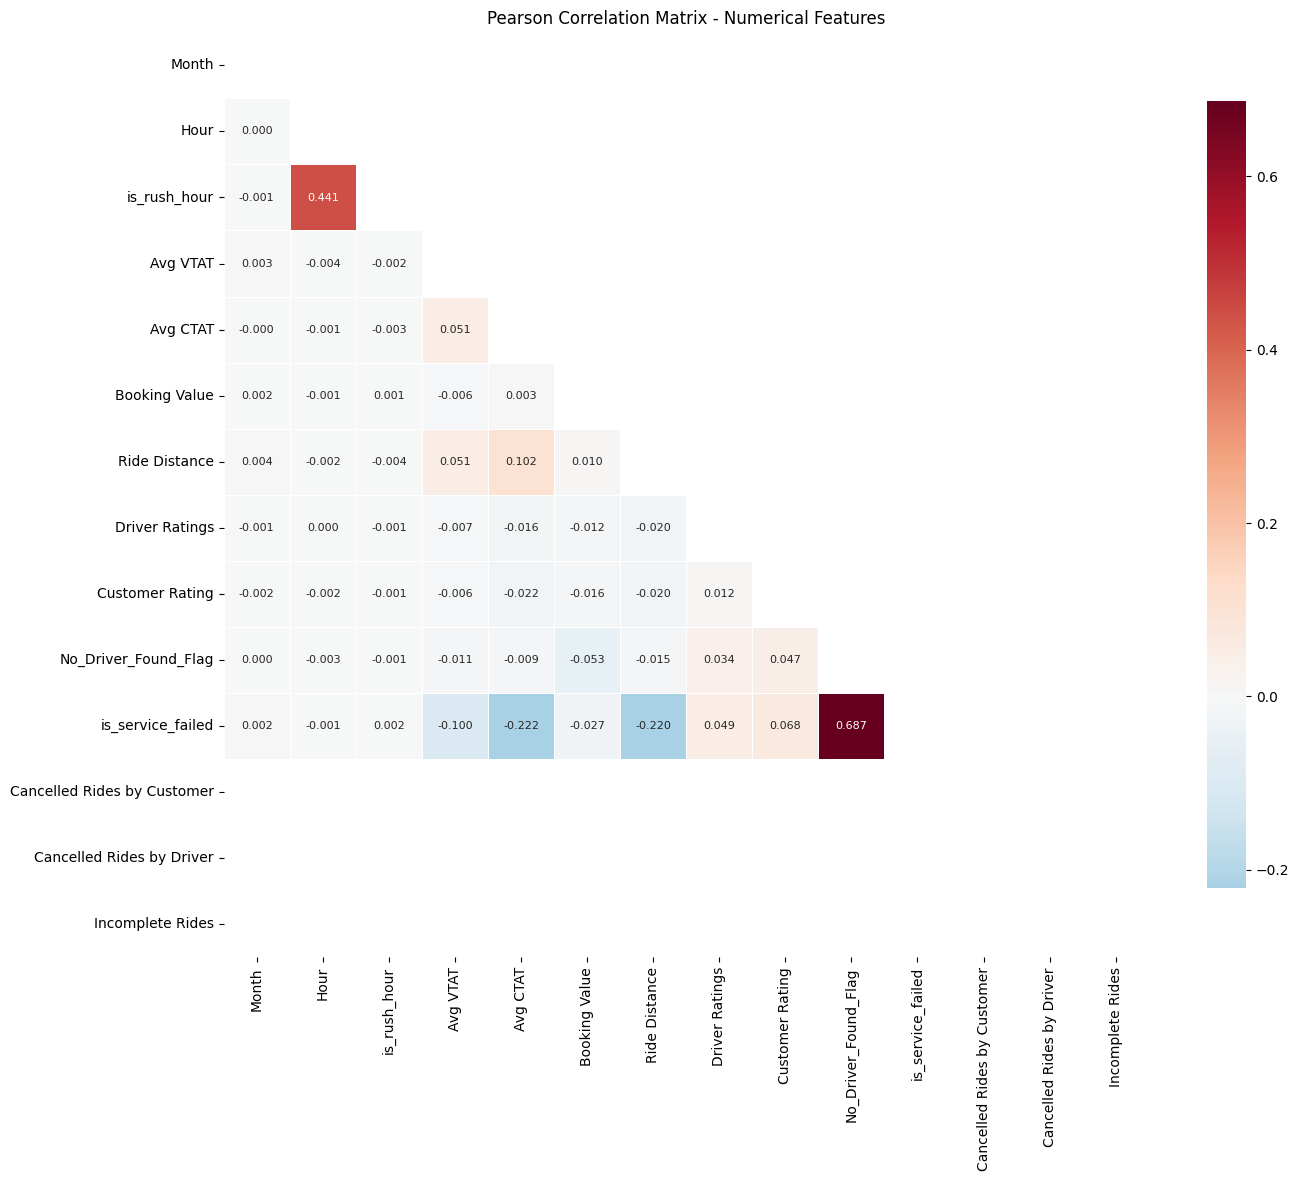

In [148]:
# ===== PEARSON CORRELATION ANALYSIS =====
print("\n" + "="*60)
print("PEARSON CORRELATION ANALYSIS")
print("="*60)

# Select all numerical features (excluding the problematic ones)
correlation_features = ['Month', 'Hour', 'is_rush_hour', 'Avg VTAT', 'Avg CTAT', 
                       'Booking Value', 'Ride Distance', 'Driver Ratings', 
                       'Customer Rating', 'No_Driver_Found_Flag', 'is_service_failed',
                       'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides']

# Filter only existing columns
correlation_features = [col for col in correlation_features if col in df_feat_imp.columns]

corr_data = df_feat_imp[correlation_features].copy()

# Handle missing values
for col in corr_data.columns:
    corr_data[col] = corr_data[col].fillna(corr_data[col].median())

# Calculate correlation matrix
correlation_matrix = corr_data.corr(method='pearson')

print(f"Correlation matrix shape: {correlation_matrix.shape}")

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8},
            fmt='.3f', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix - Numerical Features')
plt.tight_layout()
plt.show()


Correlations with Service Failure:
No_Driver_Found_Flag           0.6865
Avg CTAT                      -0.2215
Ride Distance                 -0.2201
Avg VTAT                      -0.0995
Customer Rating                0.0680
Driver Ratings                 0.0495
Booking Value                 -0.0273
Month                          0.0020
is_rush_hour                   0.0019
Hour                          -0.0007
Cancelled Rides by Customer       NaN
Cancelled Rides by Driver         NaN
Incomplete Rides                  NaN
Name: is_service_failed, dtype: float64


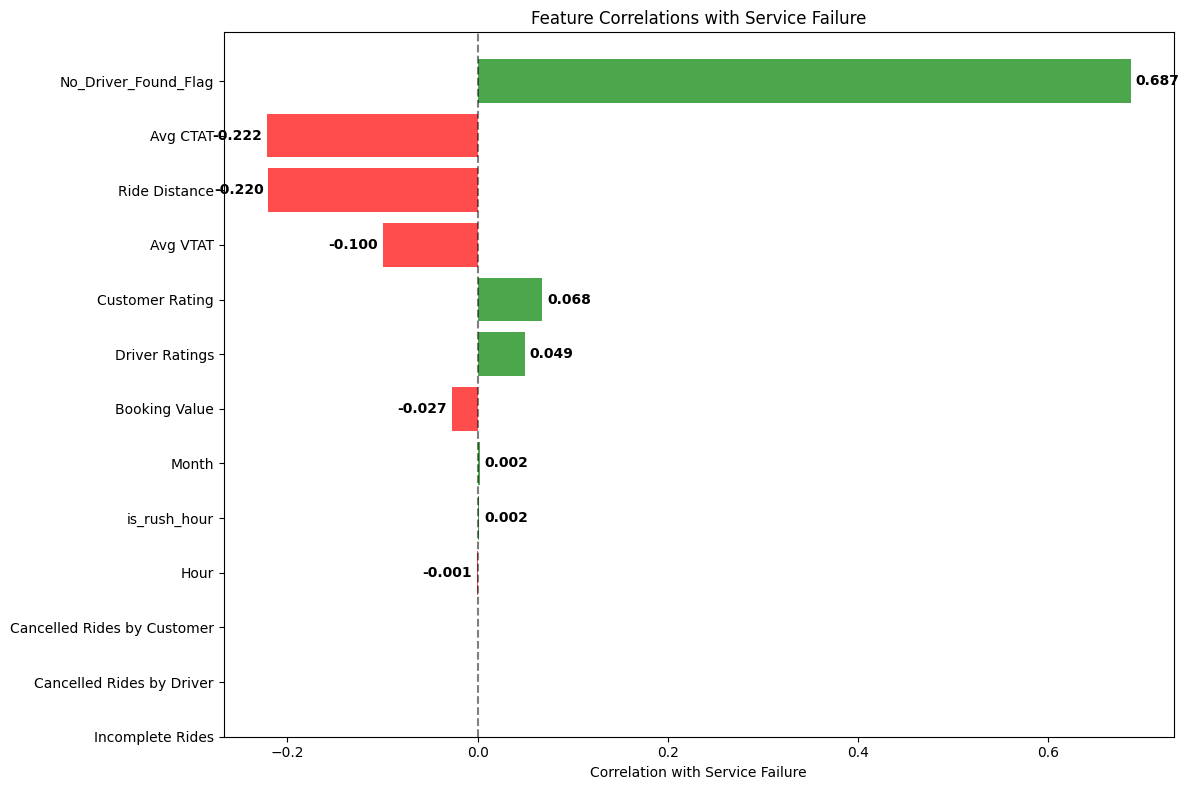

In [149]:
# Service failure correlations
service_corr = correlation_matrix['is_service_failed'].sort_values(key=abs, ascending=False)
service_corr_filtered = service_corr[service_corr.index != 'is_service_failed']

print("Correlations with Service Failure:")
print(service_corr_filtered.round(4))

# Plot service failure correlations
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in service_corr_filtered.values]
bars = plt.barh(range(len(service_corr_filtered)), service_corr_filtered.values, 
                color=colors, alpha=0.7)
plt.yticks(range(len(service_corr_filtered)), service_corr_filtered.index)
plt.xlabel('Correlation with Service Failure')
plt.title('Feature Correlations with Service Failure')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):
    plt.text(bar.get_width() + (0.005 if bar.get_width() >= 0 else -0.005), 
             bar.get_y() + bar.get_height()/2, 
             f'{service_corr_filtered.iloc[i]:.3f}', 
             va='center', ha='left' if bar.get_width() >= 0 else 'right', 
             fontweight='bold')
plt.tight_layout()
plt.show()


In [150]:
# ===== BUSINESS INSIGHTS =====
print("\n" + "="*60)
print("BUSINESS INSIGHTS")
print("="*60)

print(f"Classification Top 3: {clf_importance.head(3)['feature'].tolist()}")
print(f"Regression Top 3: {reg_importance.head(3)['feature'].tolist()}")
print(f"Strongest correlation with service failure: {service_corr_filtered.idxmax()} ({service_corr_filtered.max():.3f})")


BUSINESS INSIGHTS
Classification Top 3: ['No_Driver_Found_Flag', 'Incomplete Rides Reason', 'Avg VTAT']
Regression Top 3: ['Pickup Location', 'Month', 'Day']
Strongest correlation with service failure: No_Driver_Found_Flag (0.687)
